In [1]:
import pandas as pd
import numpy as np
import re
import glob
from itertools import cycle, islice
import matplotlib.pyplot as plt
import seaborn as sns
from fbprophet import Prophet
import plotly.graph_objects as go

# CONTRIBUTION OF VARIOUS FACTORS TO AMBIENT AIR QUALITY IN INDIA

from 2018 Study,we got to know the contribution of different sources for air pollution

### PM2.5

In [2]:
pm2= pd.read_excel(r"C:\Users\91758\Downloads\Datttta\Worldpollution contribution.xlsx", sheet_name='Sheet2')

In [3]:
pm2.drop('Unnamed: 0',axis=1,inplace=True)
pm2.rename(columns={'Traffic':'Vehicular Pollution',
                   'Industry':'Industrial Pollution'}, inplace=True)

In [4]:
pm2

,Vehicular Pollution,Industrial Pollution,Domestic fuel burning,Unspecified source of human origin,Natural sources (dust and sea salt)
0,37,4,16,22,21


C:\Users\91758\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  This is separate from the ipykernel package so we can avoid doing imports until


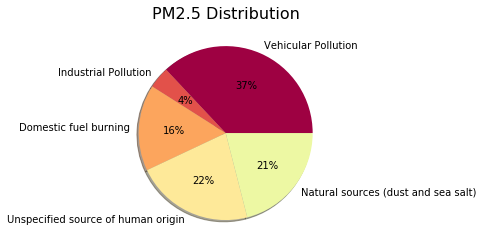

In [5]:
cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]
plt.pie(pm2,labels= pm2.columns, autopct='%0.0f%%', shadow=True,colors= colors)
plt.title("PM2.5 Distribution", fontsize=16)
plt.savefig(r'C:\Users\91758\Downloads\Datttta\Images\plot1.png')
plt.show()

### PM10

In [6]:
pm10= pd.read_excel(r"C:\Users\91758\Downloads\Datttta\Worldpollution contribution.xlsx", sheet_name='Sheet3')

In [7]:
pm10.drop('Unnamed: 0',axis=1,inplace=True)
pm10.rename(columns={'Traffic':'Vehicular Pollution',
                   'Industry':'Industrial Pollution'}, inplace=True)

In [8]:
pm10

,Vehicular Pollution,Industrial Pollution,Domestic fuel burning,Unspecified source of human origin,Natural sources (dust and sea salt)
0,34,14,11,12,29


C:\Users\91758\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  """Entry point for launching an IPython kernel.


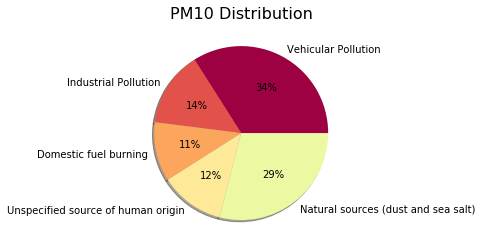

In [9]:
plt.pie(pm10,labels= pm10.columns, autopct='%0.0f%%', shadow=True,colors= colors)
plt.title("PM10 Distribution", fontsize=16)
plt.savefig(r'C:\Users\91758\Downloads\Datttta\Images\plot2.png')
plt.show()

# Vehicular Pollution

## Vehicle Population

### Pre Corona

In [10]:
veh= pd.read_excel(r"C:/Users/91758/Downloads/Datttta/STATE_WISE_TOTAL_REGISTERED_MOTOR_VEHICLES_IN_INDIA_1.xls")

In [11]:
veh.tail()

,Type,2016,2017,2018,2019
1,Luxury,34890,38989,40340,42000
2,Commercial vehicle,714232,789544,1004900,854839
3,Three wheeler,511658,548026,717590,636569
4,Two wheeler,17589511,19182574,21645160,24503000
5,Total,21897018,23781353,26801695,28998460


In [12]:
total= veh.iloc[[5], 1:].T
total

,5
2016,21897018
2017,23781353
2018,26801695
2019,28998460


In [13]:
total.reset_index(inplace=True)
total.rename(columns={'index':'Year', 5:'Sales'}, inplace=True)
total

,Year,Sales
0,2016,21897018
1,2017,23781353
2,2018,26801695
3,2019,28998460


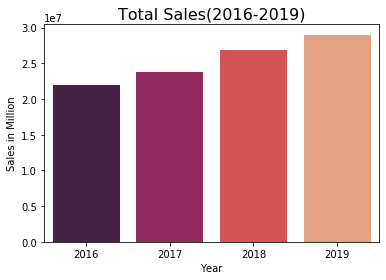

In [15]:
sns.barplot(total['Year'], total['Sales'], palette="rocket")
plt.ylabel("Sales in Million")
plt.title("Total Sales(2016-2019)", fontsize=16)
plt.savefig(r'C:\Users\91758\Downloads\Datttta\Images\plot3.png')

In [16]:
veh.drop([1,5], inplace= True)
veh

,Type,2016,2017,2018,2019
0,Passenger vehicle,3046727,3222220,3393705,2962052
2,Commercial vehicle,714232,789544,1004900,854839
3,Three wheeler,511658,548026,717590,636569
4,Two wheeler,17589511,19182574,21645160,24503000


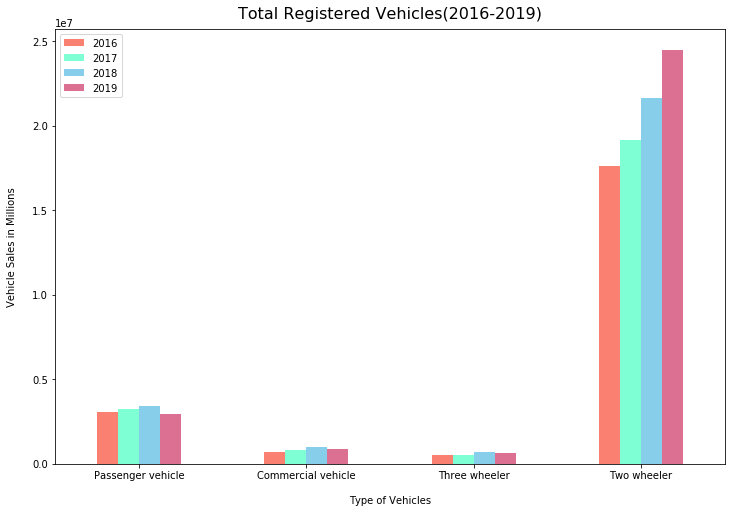

In [75]:
my_colors = list(islice(cycle(['salmon','aquamarine', 'skyblue','palevioletred']), None, len(veh)))
veh.set_index('Type')[['2016','2017','2018','2019']].plot(kind='bar', figsize=(12, 8), color= my_colors)
plt.xticks(rotation=0)
plt.title("Total Registered Vehicles(2016-2019)", fontsize=16, y=1.01)
plt.xlabel("Type of Vehicles", labelpad=15)
plt.ylabel("Vehicle Sales in Millions", labelpad=15)
plt.legend(fontsize=10, loc= 'best')
plt.savefig(r'C:\Users\91758\Downloads\Datttta\Images\plot4.png')

### Post Corona

In [21]:
veh1= pd.read_excel(r"C:/Users/91758/Downloads/Datttta/STATE_WISE_TOTAL_REGISTERED_MOTOR_VEHICLES_IN_INDIA_1.xls",  sheet_name= 'Vehicle Prediction')

In [22]:
veh1= veh1.T
header= veh1.loc['Type']
veh1.columns= header
veh1.drop('Type',inplace=True)

In [23]:
veh1.reset_index(inplace=True)
veh1.rename(columns={'index':'Month'},inplace=True)
veh1

Type,Month,Passenger vehicle,Commercial vehicle,Three wheeler,Two wheeler
0,2019Jan,280125,87591,54043,1597528
1,2019Feb,272284,87436,59875,1614941
2,2019Mar,291806,109030,66274,1440593
3,2019Apr,247541,68680,46262,1638388
4,2019May,239347,68847,39517,1726206
5,2019June,225732,70771,51885,1649477
6,2019July,200790,56866,55719,1511692
7,2019Aug,196524,51897,55719,1514196
8,2019Sept,223317,58419,66362,1656774
9,2019Oct,285027,66773,66985,1757264


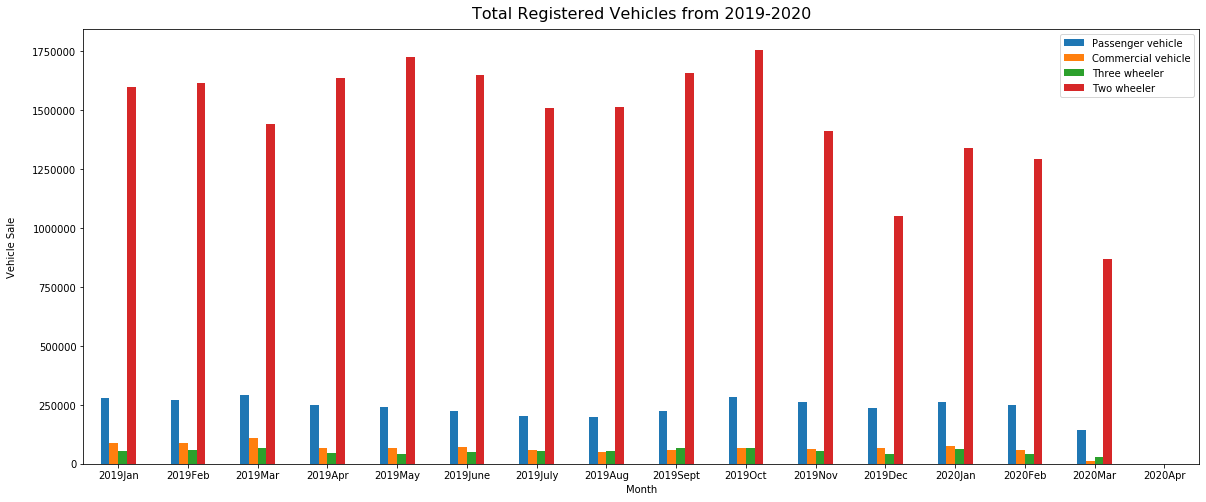

In [24]:
veh1.set_index('Month')[['Passenger vehicle','Commercial vehicle','Three wheeler','Two wheeler']].plot(kind='bar', figsize=(20, 8))
plt.xticks(rotation=0)
plt.title("Total Registered Vehicles from 2019-2020", fontsize=16, y=1.01)
#plt.xlabel("Type of Vehicles", labelpad=15)
plt.ylabel("Vehicle Sale", labelpad=15)
plt.legend(fontsize=10, loc= 'best')
plt.savefig(r'C:\Users\91758\Downloads\Datttta\Images\plot5.png')

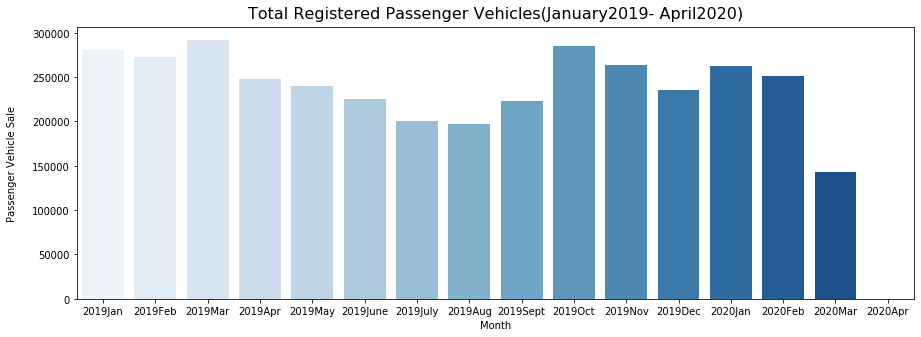

In [26]:
plt.figure(figsize=(15, 5))
sns.barplot(veh1['Month'],veh1['Passenger vehicle'], palette='Blues')
plt.title("Total Registered Passenger Vehicles(January2019- April2020)", fontsize=16, y=1.01)
plt.ylabel("Passenger Vehicle Sale", labelpad=15)
plt.savefig(r'C:\Users\91758\Downloads\Datttta\Images\plot6.png')

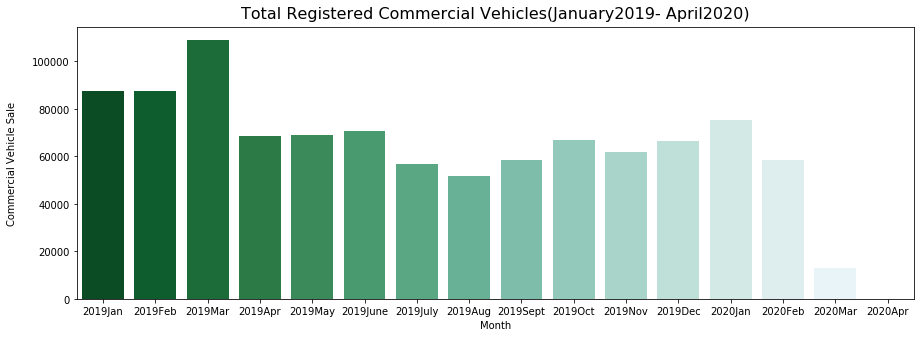

In [27]:
plt.figure(figsize=(15, 5))
sns.barplot(veh1['Month'],veh1['Commercial vehicle'], palette='BuGn_r')
plt.title("Total Registered Commercial Vehicles(January2019- April2020)", fontsize=16, y=1.01)
plt.ylabel("Commercial Vehicle Sale", labelpad=15)
plt.savefig(r'C:\Users\91758\Downloads\Datttta\Images\plot7.png')

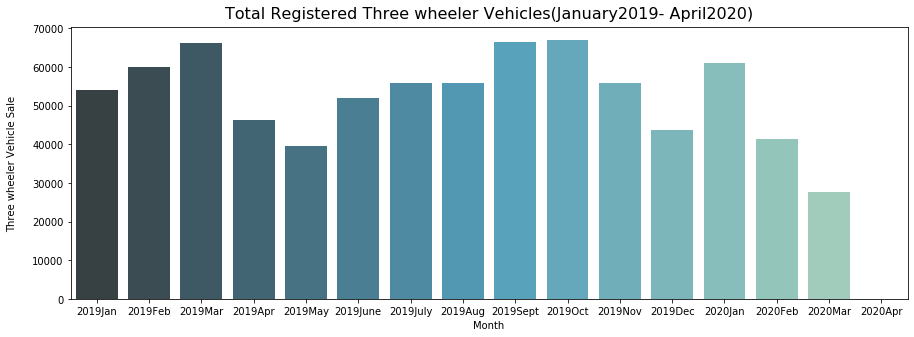

In [28]:
plt.figure(figsize=(15, 5))
sns.barplot(veh1['Month'],veh1['Three wheeler'], palette='GnBu_d')
plt.title("Total Registered Three wheeler Vehicles(January2019- April2020)", fontsize=16, y=1.01)
plt.ylabel("Three wheeler Vehicle Sale", labelpad=15)
plt.savefig(r'C:\Users\91758\Downloads\Datttta\Images\plot8.png')

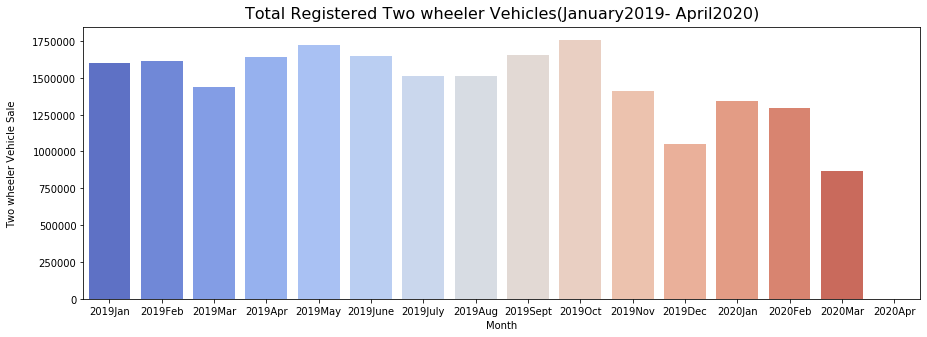

In [32]:
plt.figure(figsize=(15, 5))
sns.barplot(veh1['Month'],veh1['Two wheeler'], palette='coolwarm')
plt.title("Total Registered Two wheeler Vehicles(January2019- April2020)", fontsize=16, y=1.01)
plt.ylabel("Two wheeler Vehicle Sale", labelpad=15)
plt.savefig(r'C:\Users\91758\Downloads\Datttta\Images\plot9.png')

#### Prediction

In [33]:
vp= pd.read_excel(r"C:/Users/91758/Downloads/Datttta/STATE_WISE_TOTAL_REGISTERED_MOTOR_VEHICLES_IN_INDIA_1.xls",  sheet_name= 'Sheet1')

In [34]:
vp.head()

,Date,Passenger Vehicle,Commercial Vehicle
0,31/1/2016,231923,61670
1,29/2/2016,234274,62384
2,31/3/2016,256835,79832
3,30/4/2016,242024,53813
4,31/5/2016,231714,57112


In [35]:
vp['Date']= pd.to_datetime(vp['Date'])

In [36]:
pav= vp[['Date','Passenger Vehicle']]
cv= vp[['Date','Commercial Vehicle']]
#twow= vp[['index','Two wheeler']]
#threew= vp[['index','Three wheeler']]

In [37]:
pav.rename(columns={'Date':'ds', 'Passenger Vehicle':'y'}, inplace=True)
cv.rename(columns={'Date':'ds', 'Commercial Vehicle':'y'}, inplace=True)
#twow.rename(columns={'index':'ds', 'Two wheeler':'y'}, inplace=True)
#threew.rename(columns={'index':'ds', 'Three wheeler':'y'}, inplace=True)

C:\Users\91758\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


### Passenger Vehicle

In [38]:
m = Prophet(interval_width=0.99)
m.fit(pav)
future = m.make_future_dataframe(periods=36, freq='M')
future.tail()

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
83,2022-12-31
84,2023-01-31
85,2023-02-28
86,2023-03-31
87,2023-04-30


In [39]:
forecast = m.predict(future)
forecast[['ds', 'yhat']].tail(20)

,ds,yhat
68,2021-09-30,239387.464623
69,2021-10-31,236620.673328
70,2021-11-30,217243.425456
71,2021-12-31,198401.043453
72,2022-01-31,242969.406489
73,2022-02-28,206036.726844
74,2022-03-31,220743.083242
75,2022-04-30,193735.413816
76,2022-05-31,204940.261085
77,2022-06-30,184944.155099


In [40]:
p= forecast[['ds', 'yhat']]
p=p[-37:]

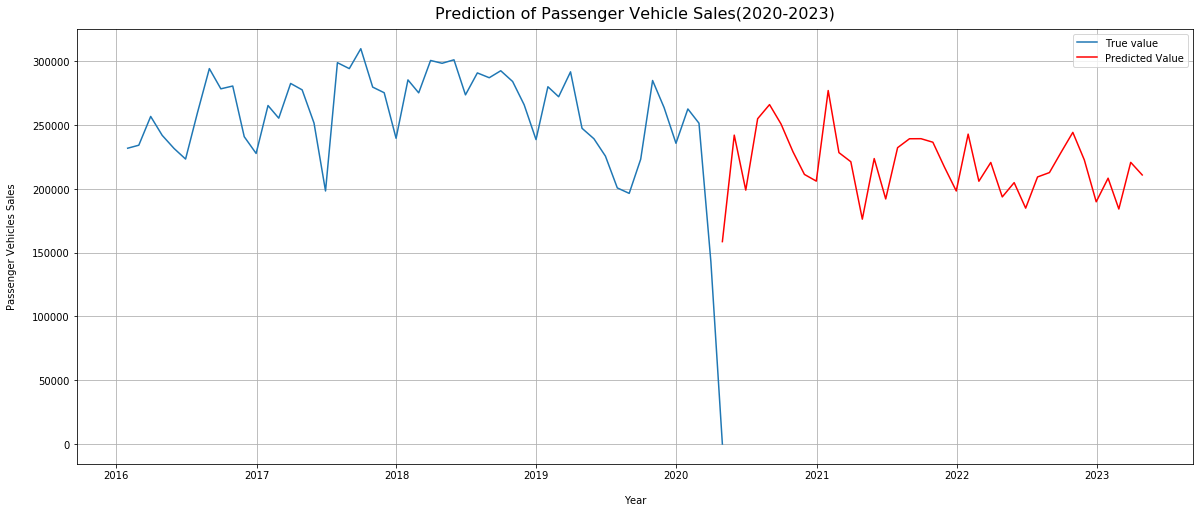

In [80]:
plt.figure(figsize=(20,8))
plt.plot(pav['ds'], pav['y'], label = "True value")
plt.plot(p['ds'], p['yhat'], label = "Predicted Value", color= 'r')
plt.xlabel('Year', labelpad=15)
plt.ylabel('Passenger Vehicles Sales', labelpad=15)
plt.title('Prediction of Passenger Vehicle Sales(2020-2023)', fontsize=16, y=1.01)
plt.legend(fontsize=10, loc= 'best')
plt.grid()
plt.savefig(r'C:\Users\91758\Downloads\Datttta\Images\plot10.png')

### Commercial Vehicle

In [51]:
m1 = Prophet(interval_width=0.95)
m1.fit(cv)
future1 = m1.make_future_dataframe(periods=36, freq='M')
forecast1 = m1.predict(future)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [52]:
cv.head()

,ds,y
0,2016-01-31,61670
1,2016-02-29,62384
2,2016-03-31,79832
3,2016-04-30,53813
4,2016-05-31,57112


In [53]:
p1= forecast1[['ds', 'yhat']]
p1=p1[-37:]

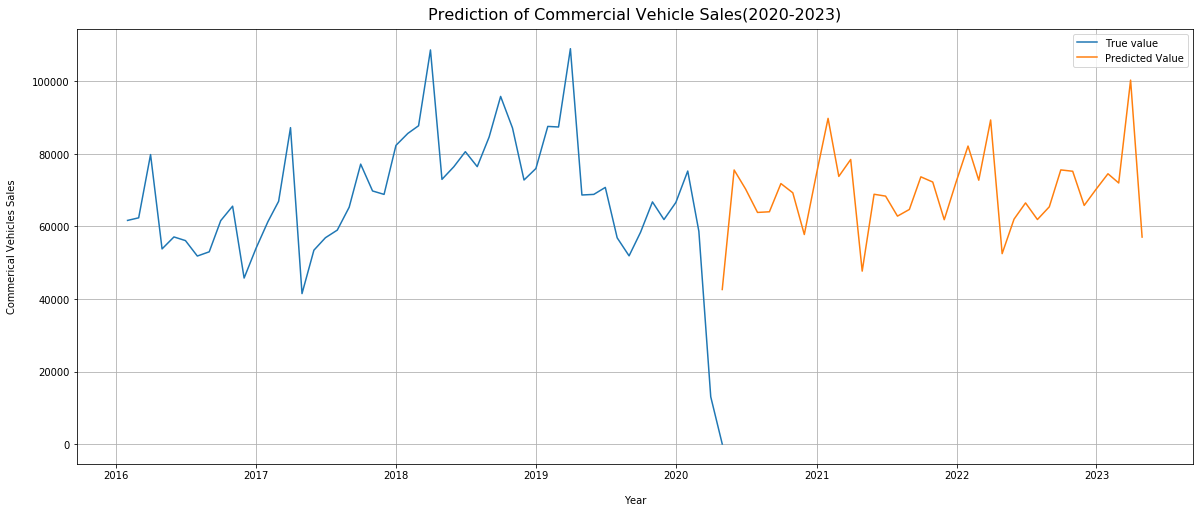

In [58]:
plt.figure(figsize=(20,8))
plt.plot(cv['ds'], cv['y'], label = "True value")
plt.plot(p1['ds'], p1['yhat'], label = "Predicted Value")
plt.xlabel('Year', labelpad=15)
plt.ylabel('Commerical Vehicles Sales', labelpad=15)
plt.title('Prediction of Commercial Vehicle Sales(2020-2023)', fontsize=16, y=1.01)
plt.grid()
plt.legend(fontsize=10, loc= 'best')
plt.savefig(r'C:\Users\91758\Downloads\Datttta\Images\plot11.png')

## Fuel Consumption

In [59]:
fuel= pd.read_excel(r"C:\Users\91758\Downloads\Datttta\Fuel Consumption.xlsx")
fuel

,Type,2016-2017,2017-2018,2018-2019,2019-2020
0,Diesel,76.0,81.1,83.5,84.3
1,Petrol,23.8,26.2,28.3,26.6


In [60]:
fuel=fuel.T
head= fuel.loc['Type']

In [61]:
fuel.columns= head
fuel.drop('Type', inplace=True)
fuel

Type,Diesel,Petrol
2016-2017,76,23.8
2017-2018,81.1,26.2
2018-2019,83.5,28.3
2019-2020,84.3,26.6


In [62]:
fuel.reset_index(inplace=True)

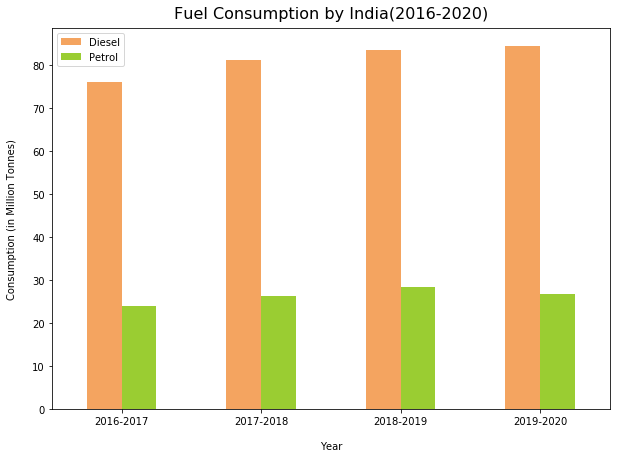

In [81]:
my_colors = list(islice(cycle(['sandybrown', 'yellowgreen']), None, len(fuel)))
fuel.set_index('index')[['Diesel','Petrol']].plot(kind='bar', figsize=(10, 7), color=my_colors)
plt.xticks(rotation=0)
plt.title("Fuel Consumption by India(2016-2020)", fontsize=16, y=1.01)
plt.xlabel("Year", labelpad=15)
plt.ylabel("Consumption (in Million Tonnes)", labelpad=15)
plt.legend(fontsize=10, loc= 'best')
plt.savefig(r'C:\Users\91758\Downloads\Datttta\Images\plot12.png')

With decline in vehicles purchased and decline in vehicle population, there will be decline in fuel consumption in the coming years

# Industrial Pollution

The Central Pollution Control Board (CPCB) has developed a Comprehensive Environmental Pollution Index (CEPI). CPCB has done a nation wide environmental assessment of Industrial Clusters based on CEPI and 43 such industrial clusters having CEPI greater than 70, on a scale of 0 to 100, has been identified as critically polluted.


The data refers to the Comprehensive Environmental Pollution Index (CEPI) scores of the critically polluted industrial clusters/areas. The index captures the various dimensions of environment including air, water and land.


Comprehensive Environmental Pollution Index (CEPI), which is a rational number to characterize the environmental quality at a given location following the algorithm of source, pathway and receptor have been developed.


In [76]:
industry= pd.read_excel(r"C:\Users\91758\Downloads\Datttta\industry.xlsx")
industry

,Sl.,Name of Polluted Industrial Areas (PIAs),CEPI 2016,CEPI 2017,Air,CEPI 2018,# Status of Environment,CEPI 2019,CEPI 2020
0,1,Tarapur(Maharashtra),73.30,67.67,72.00,93.69,Ac*_Wc_Ls,NaN,72.01
1,2,"Najafgarh-Drain basin including Anand Parbat, ...",73.42,73.42,85.25,92.65,Ac_Wc_Ls,79.54,79.54
2,3,Mathura (Uttar Pradesh),NaN,NaN,86.00,91.10,Ac_Wc_Ln,NaN,69.00
3,4,Kanpur (Uttar Pradesh),72.31,NaN,66.00,89.46,Ac_Wc_Ln,NaN,78.09
4,5,Vadodara (Gujarat),69.54,NaN,82.00,89.09,Ac_Wc_Ln,NaN,75.28
5,6,Moradabad (Uttar Pradesh),NaN,NaN,76.00,87.80,Ac_Wc_Lc,NaN,72.00
6,7,Varanasi-Mirzapur (Uttar Pradesh),56.91,NaN,67.50,85.35,Ac_Wc_Ln,NaN,73.79
7,8,Bulandsahar-Khurza (Uttar Pradesh),NaN,NaN,79.50,85.23,Ac_Wc_Ln,NaN,73.00
8,9,Gurgaon(Haryana),73.30,NaN,70.00,85.15,Ac_Wc_Ln,NaN,77.07
9,10,Manali (Tamil Nadu),77.26,NaN,59.75,84.15,As**_Wc_Lc,NaN,76.32


In [77]:
industry.drop(['CEPI 2017','CEPI 2019'], axis=1, inplace=True)

In [78]:
industry["Name of Polluted Industrial Areas (PIAs)"]=industry["Name of Polluted Industrial Areas (PIAs)"].str.split("(", expand= True)

In [79]:
industry

,Sl.,Name of Polluted Industrial Areas (PIAs),CEPI 2016,Air,CEPI 2018,# Status of Environment,CEPI 2020
0,1,Tarapur,73.30,72.00,93.69,Ac*_Wc_Ls,72.01
1,2,"Najafgarh-Drain basin including Anand Parbat, ...",73.42,85.25,92.65,Ac_Wc_Ls,79.54
2,3,Mathura,NaN,86.00,91.10,Ac_Wc_Ln,69.00
3,4,Kanpur,72.31,66.00,89.46,Ac_Wc_Ln,78.09
4,5,Vadodara,69.54,82.00,89.09,Ac_Wc_Ln,75.28
5,6,Moradabad,NaN,76.00,87.80,Ac_Wc_Lc,72.00
6,7,Varanasi-Mirzapur,56.91,67.50,85.35,Ac_Wc_Ln,73.79
7,8,Bulandsahar-Khurza,NaN,79.50,85.23,Ac_Wc_Ln,73.00
8,9,Gurgaon,73.30,70.00,85.15,Ac_Wc_Ln,77.07
9,10,Manali,77.26,59.75,84.15,As**_Wc_Lc,76.32


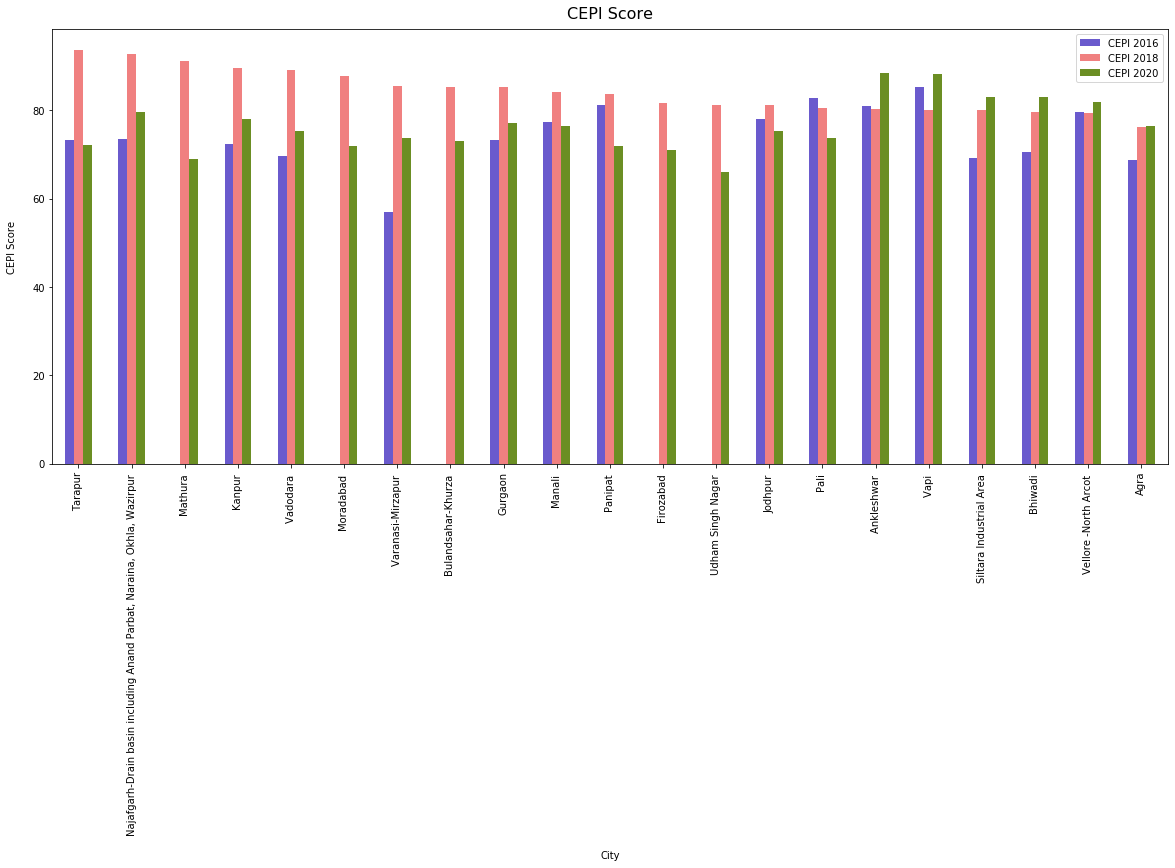

In [90]:
my_colors = list(islice(cycle(['slateblue','lightcoral', 'olivedrab']), None, len(fuel)))
industry.set_index('Name of Polluted Industrial Areas (PIAs)')[['CEPI 2016','CEPI 2018','CEPI 2020']].plot(kind='bar', figsize=(20,8), color=my_colors)
plt.xticks(rotation=90)
plt.title("CEPI Score", fontsize=16, y=1.01)
plt.xlabel("City", labelpad=15)
plt.ylabel("CEPI Score", labelpad=15)
plt.legend(fontsize=10, loc= 'best')
plt.savefig(r'C:\Users\91758\Downloads\Datttta\Images\plot13.png')

# Air Quality Index

### Pre Corona

In [2]:
df= pd.read_csv(r"C:\Users\91758\Downloads\kamka data\New folder\city_day.csv")

In [3]:
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,1/1/2015,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,1/2/2015,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,1/3/2015,NaN,NaN,17.4,19.3,29.7,NaN,17.4,29.07,30.7,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,1/4/2015,NaN,NaN,1.7,18.48,17.97,NaN,1.7,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,1/5/2015,NaN,NaN,22.1,21.42,37.76,NaN,22.1,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26546,Thiruvananthapuram,5/18/2020,23.0,24,NaN,3,NaN,NaN,5,5,19,NaN,NaN,NaN,NaN,NaN
26547,Thiruvananthapuram,5/19/2020,45.0,10,NaN,3,NaN,NaN,5,6,19,NaN,NaN,NaN,NaN,NaN
26548,Thiruvananthapuram,5/20/2020,32.0,5,NaN,4,NaN,NaN,5,5,16,NaN,NaN,NaN,NaN,NaN
26549,Thiruvananthapuram,5/21/2020,15.0,5,NaN,4,NaN,NaN,5,5,16,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26551 entries, 0 to 26550
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        26551 non-null  object 
 1   Date        26551 non-null  object 
 2   PM2.5       22261 non-null  float64
 3   PM10        15745 non-null  object 
 4   NO          22998 non-null  object 
 5   NO2         23331 non-null  object 
 6   NOx         22216 non-null  object 
 7   NH3         16391 non-null  object 
 8   CO          24534 non-null  object 
 9   SO2         23005 non-null  object 
 10  O3          22875 non-null  object 
 11  Benzene     20932 non-null  float64
 12  Toluene     18664 non-null  float64
 13  Xylene      9412 non-null   float64
 14  AQI         21937 non-null  float64
 15  AQI_Bucket  21937 non-null  object 
dtypes: float64(5), object(11)
memory usage: 3.2+ MB


In [5]:
df.isnull().sum()

City              0
Date              0
PM2.5          4290
PM10          10806
NO             3553
NO2            3220
NOx            4335
NH3           10160
CO             2017
SO2            3546
O3             3676
Benzene        5619
Toluene        7887
Xylene        17139
AQI            4614
AQI_Bucket     4614
dtype: int64

In [6]:
df.replace(r'^\s+',np.nan,regex= True,inplace=True)

In [7]:
df.isnull().sum()

City              0
Date              0
PM2.5          4290
PM10          10808
NO             3565
NO2            3230
NOx            4375
NH3           10179
CO             2023
SO2            3554
O3             3687
Benzene        5619
Toluene        7887
Xylene        17139
AQI            4614
AQI_Bucket     4614
dtype: int64

In [8]:
y= df['AQI_Bucket']
x= df.drop('AQI_Bucket', axis=1)

In [9]:
x.ffill(axis=0, inplace= True)

In [10]:
x.fillna(0, inplace= True)

In [11]:
x.isna().sum()

City       0
Date       0
PM2.5      0
PM10       0
NO         0
NO2        0
NOx        0
NH3        0
CO         0
SO2        0
O3         0
Benzene    0
Toluene    0
Xylene     0
AQI        0
dtype: int64

In [12]:
l= ['PM10','NO','NO2','NOx','NH3','CO','SO2','O3']
for i in l:
    x[i]= x[i].apply(pd.to_numeric)

In [13]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26551 entries, 0 to 26550
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   City     26551 non-null  object 
 1   Date     26551 non-null  object 
 2   PM2.5    26551 non-null  float64
 3   PM10     26551 non-null  float64
 4   NO       26551 non-null  float64
 5   NO2      26551 non-null  float64
 6   NOx      26551 non-null  float64
 7   NH3      26551 non-null  float64
 8   CO       26551 non-null  float64
 9   SO2      26551 non-null  float64
 10  O3       26551 non-null  float64
 11  Benzene  26551 non-null  float64
 12  Toluene  26551 non-null  float64
 13  Xylene   26551 non-null  float64
 14  AQI      26551 non-null  float64
dtypes: float64(13), object(2)
memory usage: 3.0+ MB


In [14]:
df= pd.concat([x,y], axis=1)

In [15]:
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,1/1/2015,0.0,0.0,0.92,18.22,17.15,0.0,0.92,27.64,133.36,0.00,0.02,0.00,0.0,NaN
1,Ahmedabad,1/2/2015,0.0,0.0,0.97,15.69,16.46,0.0,0.97,24.55,34.06,3.68,5.50,3.77,0.0,NaN
2,Ahmedabad,1/3/2015,0.0,0.0,17.40,19.30,29.70,0.0,17.40,29.07,30.70,6.80,16.40,2.25,0.0,NaN
3,Ahmedabad,1/4/2015,0.0,0.0,1.70,18.48,17.97,0.0,1.70,18.59,36.08,4.43,10.14,1.00,0.0,NaN
4,Ahmedabad,1/5/2015,0.0,0.0,22.10,21.42,37.76,0.0,22.10,39.33,39.31,7.01,18.89,2.78,0.0,NaN


In [16]:
#p.to_excel("aqi.xlsx")

In [17]:
df['Date']= pd.to_datetime(df['Date'])

### Visualization

In [18]:
df=df[df['Date']>= '2016-01-01']

In [19]:
df['Date'].min()

Timestamp('2016-01-01 00:00:00')

In [20]:
p= pd.pivot_table(df, index=['City'])
p

,AQI,Benzene,CO,NH3,NO,NO2,NOx,O3,PM10,PM2.5,SO2,Toluene,Xylene
City,,,,,,,,,,,,,
Ahmedabad,453.139651,5.312269,19.440411,0.000000,19.462344,53.415374,44.122805,39.631328,26.830075,96.866278,59.315330,26.614476,3.970468
Aizawl,50.730769,5.800577,0.359231,23.265000,6.503462,0.499231,8.818462,5.314038,35.171346,27.914423,6.420385,6.217500,3.220000
Amaravati,93.595815,0.702665,0.614945,12.636333,5.294317,22.214824,15.646289,37.267368,75.073205,38.212555,14.332500,3.048833,1.587720
Amritsar,121.317528,3.892354,0.644903,14.304056,18.546986,18.472388,28.874936,22.023124,117.663243,55.086240,7.352981,2.888527,6.290864
Bengaluru,92.114713,1.218067,1.081521,25.602450,10.078872,29.972756,20.661203,35.119383,84.118261,37.459776,5.279875,3.108791,8.810000
Bhopal,140.504386,0.280000,0.973772,20.509079,8.267675,36.340482,26.075833,57.929167,130.316974,57.023596,13.236272,0.610000,8.810000
Brajrajnagar,148.180160,4.278951,1.813979,34.962338,17.313466,14.954641,22.382166,14.256967,117.574185,63.090148,9.522372,0.610000,8.810000
Chandigarh,99.492366,5.369542,0.953397,29.290115,11.862863,12.100344,16.741947,16.208130,88.259885,46.745840,9.312290,1.366489,2.952252
Chennai,108.354959,0.980618,1.352277,84.458185,8.265365,16.227692,17.570281,31.458322,63.041915,49.590193,7.360817,2.502433,1.300000


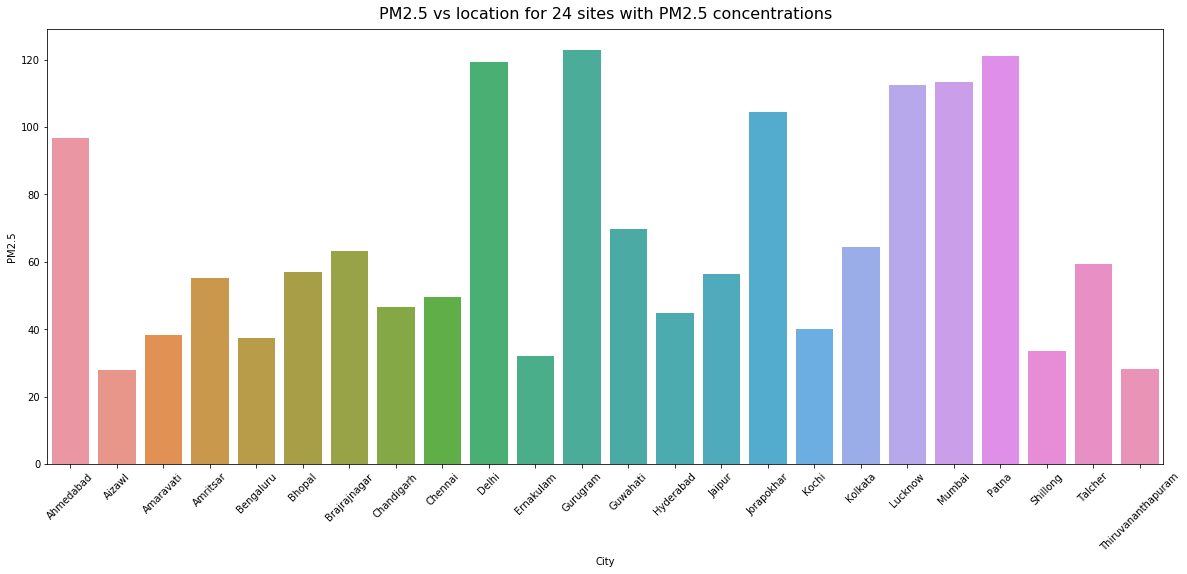

In [21]:
plt.figure(figsize=(20,8))
sns.barplot(p.index, p['PM2.5'])
plt.xticks(rotation=45)
plt.title("PM2.5 vs location for 24 sites with PM2.5 concentrations", fontsize=16, y=1.01)
plt.savefig(r'C:\Users\91758\Downloads\Datttta\Images\plot14.png')

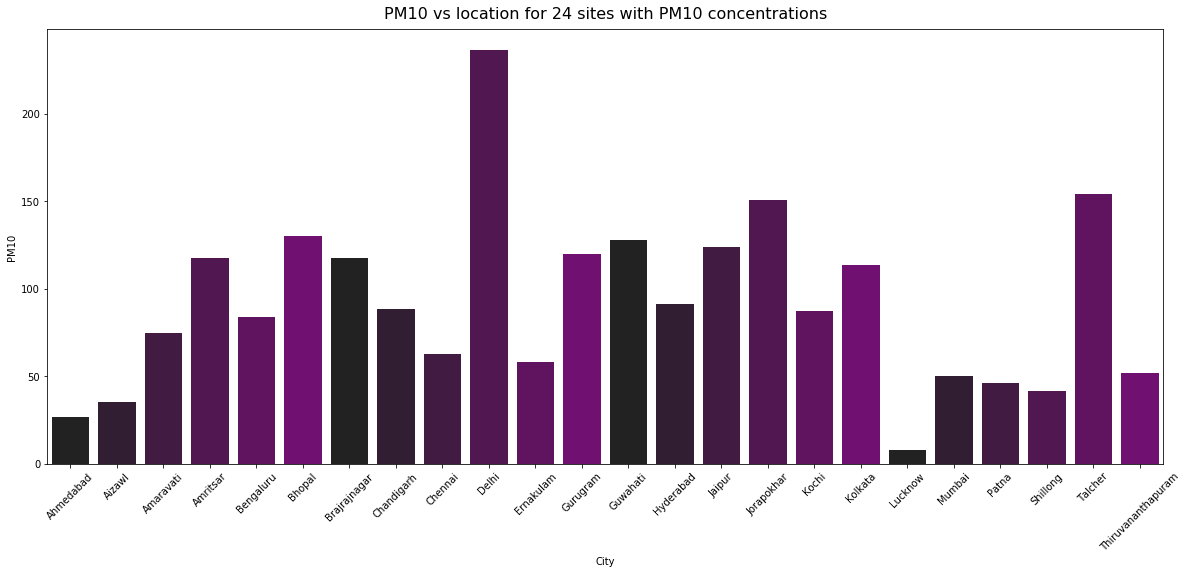

In [22]:
plt.figure(figsize=(20,8))
sns.barplot(p.index, p['PM10'], palette=sns.dark_palette("purple"))
plt.xticks(rotation=45)
plt.title("PM10 vs location for 24 sites with PM10 concentrations", fontsize=16, y=1.01)
plt.savefig(r'C:\Users\91758\Downloads\Datttta\Images\plot15.png')

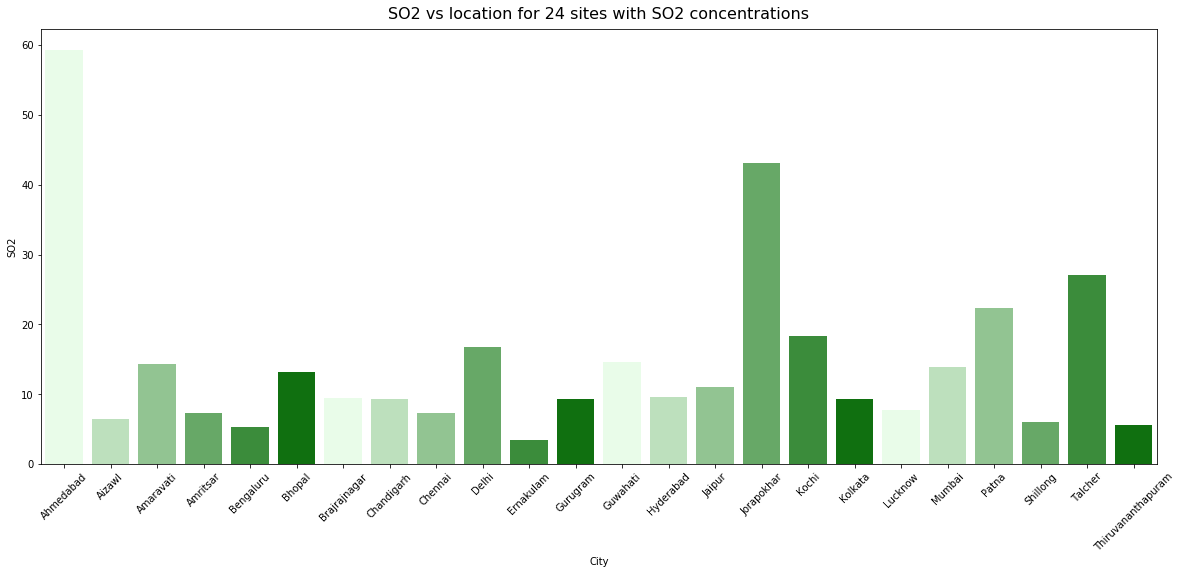

In [23]:
plt.figure(figsize=(20,8))
sns.barplot(p.index, p['SO2'],palette=sns.light_palette("green"))
plt.xticks(rotation=45)
plt.title("SO2 vs location for 24 sites with SO2 concentrations", fontsize=16, y=1.01)
plt.savefig(r'C:\Users\91758\Downloads\Datttta\Images\plot16.png')

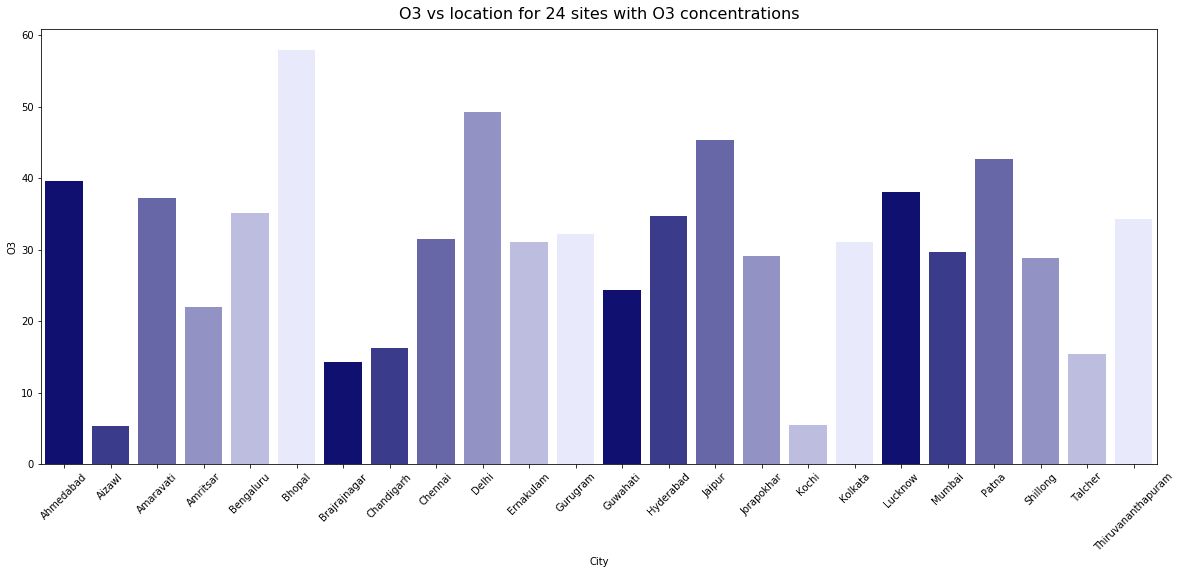

In [24]:
plt.figure(figsize=(20,8))
sns.barplot(p.index, p['O3'], palette=sns.light_palette("navy", reverse=True))
plt.xticks(rotation=45)
plt.title("O3 vs location for 24 sites with O3 concentrations", fontsize=16, y=1.01)
plt.savefig(r'C:\Users\91758\Downloads\Datttta\Images\plot17.png')

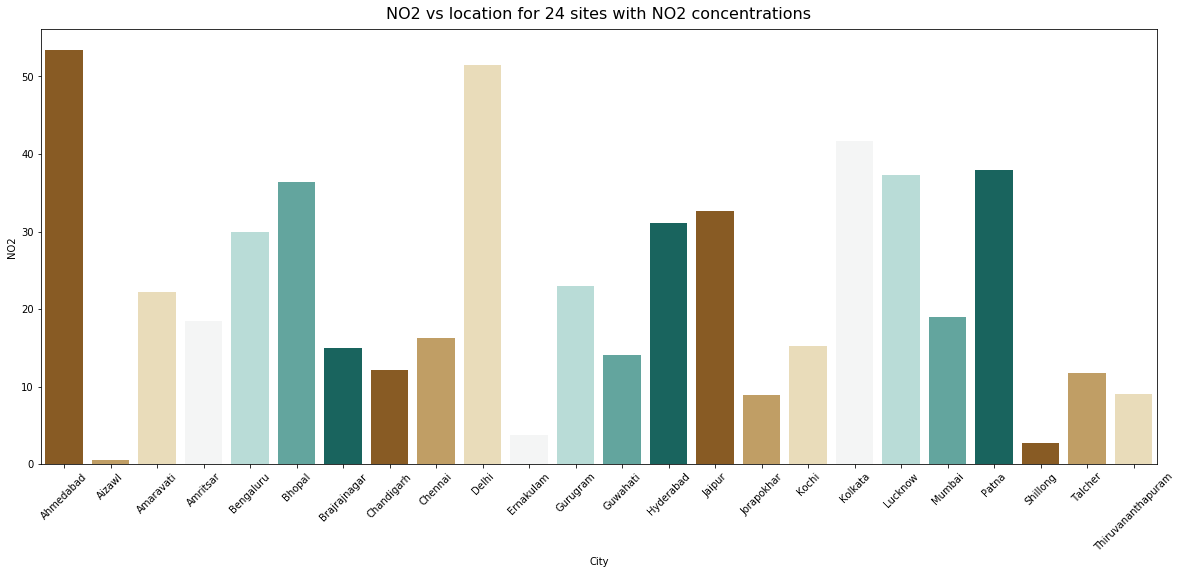

In [25]:
plt.figure(figsize=(20,8))
sns.barplot(p.index, p['NO2'], palette=sns.color_palette("BrBG", 7))
plt.xticks(rotation=45)
plt.title("NO2 vs location for 24 sites with NO2 concentrations", fontsize=16, y=1.01)
plt.savefig(r'C:\Users\91758\Downloads\Datttta\Images\plot18.png')

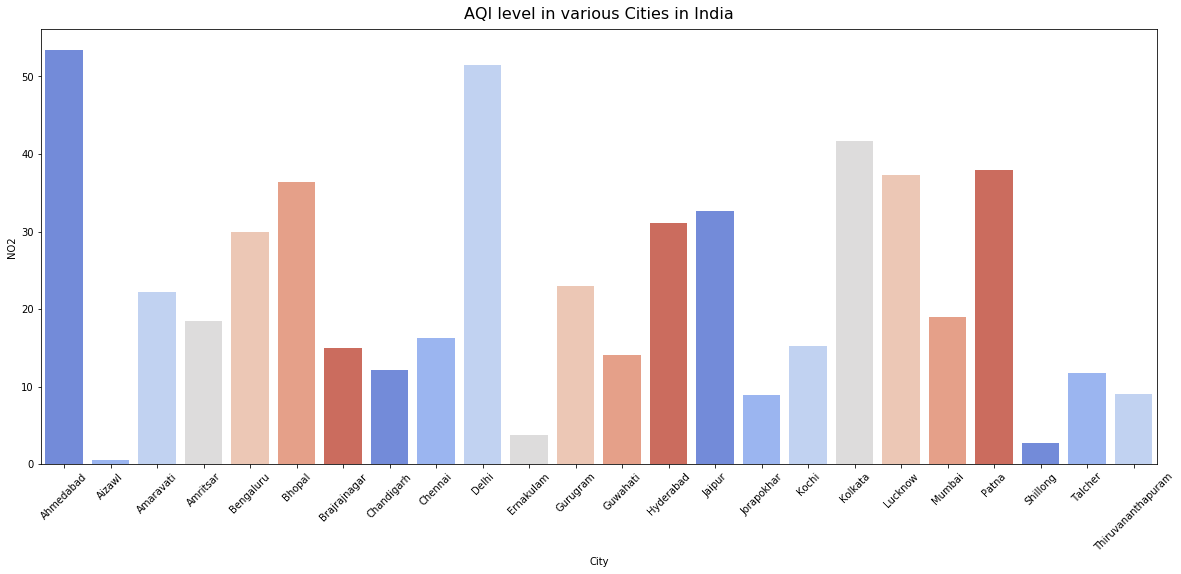

In [26]:
plt.figure(figsize=(20,8))
sns.barplot(p.index, p['NO2'], palette=sns.color_palette("coolwarm", 7))
plt.xticks(rotation=45)
plt.title("AQI level in various Cities in India", fontsize=16, y=1.01) 
plt.savefig(r'C:\Users\91758\Downloads\Datttta\Images\plot19.png')

In [140]:
cor= p.corr()

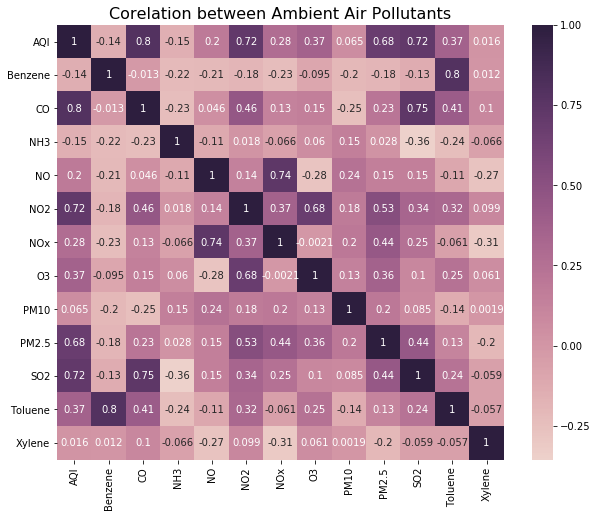

In [176]:
cmap = sns.cubehelix_palette(as_cmap=True)
plt.figure(figsize=(10,8))
sns.heatmap(cor, cmap=cmap,annot=True)
plt.title("Corelation between Ambient Air Pollutants", fontsize=16, y=1.01)
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
#plt.show() # ta-da!
plt.savefig(r'C:\Users\91758\Downloads\Datttta\Images\plot36.png')

### Map

In [230]:
maa=p
maa.reset_index(inplace=True)
maa.rename(columns={'index':'City'},inplace=True)
maa.head()

,City,AQI,Benzene,CO,NH3,NO,NO2,NOx,O3,PM10,PM2.5,SO2,Toluene,Xylene
0,Ahmedabad,453.139651,5.312269,19.440411,0.000000,19.462344,53.415374,44.122805,39.631328,26.830075,96.866278,59.315330,26.614476,3.970468
1,Aizawl,50.730769,5.800577,0.359231,23.265000,6.503462,0.499231,8.818462,5.314038,35.171346,27.914423,6.420385,6.217500,3.220000
2,Amaravati,93.595815,0.702665,0.614945,12.636333,5.294317,22.214824,15.646289,37.267368,75.073205,38.212555,14.332500,3.048833,1.587720
3,Amritsar,121.317528,3.892354,0.644903,14.304056,18.546986,18.472388,28.874936,22.023124,117.663243,55.086240,7.352981,2.888527,6.290864
4,Bengaluru,92.114713,1.218067,1.081521,25.602450,10.078872,29.972756,20.661203,35.119383,84.118261,37.459776,5.279875,3.108791,8.810000


In [228]:
ll= pd.read_excel(r"C:\Users\91758\Downloads\Datttta\Longitude Latitude.xlsx")
ll.head()

,City,Latitude,Longitude
0,Ahmedabad,23.025793,72.587265
1,Aizawl,23.727106,92.717636
2,Amaravati,20.932000,77.752300
3,Amritsar,31.634000,74.872300
4,Bengaluru,12.977063,77.587106


In [232]:
maa=maa.merge(ll, on='City')
maa.head()

,City,AQI,Benzene,CO,NH3,NO,NO2,NOx,O3,PM10,PM2.5,SO2,Toluene,Xylene,Latitude,Longitude
0,Ahmedabad,453.139651,5.312269,19.440411,0.000000,19.462344,53.415374,44.122805,39.631328,26.830075,96.866278,59.315330,26.614476,3.970468,23.025793,72.587265
1,Aizawl,50.730769,5.800577,0.359231,23.265000,6.503462,0.499231,8.818462,5.314038,35.171346,27.914423,6.420385,6.217500,3.220000,23.727106,92.717636
2,Amaravati,93.595815,0.702665,0.614945,12.636333,5.294317,22.214824,15.646289,37.267368,75.073205,38.212555,14.332500,3.048833,1.587720,20.932000,77.752300
3,Amritsar,121.317528,3.892354,0.644903,14.304056,18.546986,18.472388,28.874936,22.023124,117.663243,55.086240,7.352981,2.888527,6.290864,31.634000,74.872300
4,Bengaluru,92.114713,1.218067,1.081521,25.602450,10.078872,29.972756,20.661203,35.119383,84.118261,37.459776,5.279875,3.108791,8.810000,12.977063,77.587106


In [233]:
mp=maa[['City','Latitude','Longitude','PM2.5']]
mpm= maa[['City','Latitude','Longitude','PM10']]
mn=maa[['City','Latitude','Longitude','NO2']]
ms=maa[['City','Latitude','Longitude','SO2']]

In [35]:
import folium 
from folium import plugins

In [246]:
# PM2.5
m = folium.Map(location=[20,70], tiles='Stamenterrain', zoom_start=4)
 
# I can add marker one by one on the map
for i in range(0,len(mp)):
    folium.Circle(
      location=[mp.iloc[i]['Latitude'], mp.iloc[i]['Longitude']],
      popup=mp.iloc[i]['City'],
      radius=mp.iloc[i]['PM2.5']*1000,
      color='crimson',
      fill=True,
      fill_color='crimson'
   ).add_to(m)

m.save(r'C:\Users\91758\Downloads\Datttta\Images\PM2.html')

In [247]:
# PM10
m = folium.Map(location=[20,70], tiles='Stamenterrain', zoom_start=4)
 
# I can add marker one by one on the map
for i in range(0,len(mpm)):
    folium.Circle(
      location=[mpm.iloc[i]['Latitude'], mpm.iloc[i]['Longitude']],
      popup=mpm.iloc[i]['City'],
      radius=mpm.iloc[i]['PM10']*1000,
      color='crimson',
      fill=True,
      fill_color='crimson'
   ).add_to(m)

m.save(r'C:\Users\91758\Downloads\Datttta\Images\PM10.html')

In [248]:
# NO2
m = folium.Map(location=[20,70], tiles='Stamenterrain', zoom_start=4)
 
# I can add marker one by one on the map
for i in range(0,len(mn)):
    folium.Circle(
      location=[mn.iloc[i]['Latitude'], mn.iloc[i]['Longitude']],
      popup=mn.iloc[i]['City'],
      radius=mn.iloc[i]['NO2']*1000,
      color='crimson',
      fill=True,
      fill_color='crimson'
   ).add_to(m)

m.save(r'C:\Users\91758\Downloads\Datttta\Images\NO2.html')

In [249]:
# SO2
m = folium.Map(location=[20,70], tiles='Stamenterrain', zoom_start=4)
 
# I can add marker one by one on the map
for i in range(0,len(ms)):
    folium.Circle(
      location=[ms.iloc[i]['Latitude'], ms.iloc[i]['Longitude']],
      popup=ms.iloc[i]['City'],
      radius=ms.iloc[i]['SO2']*1000,
      color='crimson',
      fill=True,
      fill_color='crimson'
   ).add_to(m)

m.save(r'C:\Users\91758\Downloads\Datttta\Images\SO2.html')

In [27]:
#pt is down.Execute it first--- no need just ignore this comment
mad= df[df['Date']>='2019-01-01']
mad= mad[mad['Date']<='2019-12-31']
mad

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
1461,Ahmedabad,2019-01-01,110.71,0.00,63.03,111.56,100.04,0.00,63.03,80.15,57.12,4.08,32.33,6.93,1474.0,Severe
1462,Ahmedabad,2019-01-02,147.57,0.00,59.56,107.46,129.87,0.00,59.56,47.70,48.23,4.10,32.34,6.99,1246.0,Severe
1463,Ahmedabad,2019-01-03,131.50,0.00,119.68,75.82,88.04,0.00,119.68,55.29,43.25,4.09,32.42,7.00,1719.0,Severe
1464,Ahmedabad,2019-01-04,102.12,0.00,57.92,95.29,54.93,0.00,57.92,69.02,51.71,4.09,32.38,6.98,1264.0,Severe
1465,Ahmedabad,2019-01-05,115.00,0.00,63.86,111.04,61.99,0.00,63.86,86.65,59.25,4.12,32.43,6.97,1127.0,Severe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26403,Thiruvananthapuram,2019-12-27,21.29,49.14,31.49,24.75,38.70,10.92,1.89,9.29,29.09,0.00,0.00,2.75,103.0,Moderate
26404,Thiruvananthapuram,2019-12-28,32.54,62.85,16.91,29.29,28.18,14.12,1.63,8.58,37.06,0.00,0.00,2.75,89.0,Satisfactory
26405,Thiruvananthapuram,2019-12-29,45.06,72.67,10.38,27.49,23.01,9.93,2.26,9.30,44.11,0.00,0.00,2.75,110.0,Moderate
26406,Thiruvananthapuram,2019-12-30,44.74,73.72,10.75,27.32,23.22,9.58,1.94,8.64,43.56,0.00,0.00,2.75,108.0,Moderate


In [29]:
piv=  mad.pivot_table(index=['City'])
piv

,AQI,Benzene,CO,NH3,NO,NO2,NOx,O3,PM10,PM2.5,SO2,Toluene,Xylene
City,,,,,,,,,,,,,
Ahmedabad,516.424658,5.078685,25.885562,0.000000,25.885562,90.311890,62.659918,46.003534,77.145288,61.809452,73.333205,43.211890,5.265479
Amaravati,89.873973,0.335260,0.612521,10.912110,6.191589,21.727096,15.291534,34.295808,70.908466,35.358767,15.706740,2.215781,0.196329
Amritsar,109.065753,3.718630,0.530521,15.458055,17.136548,15.811397,28.737233,21.226493,97.273151,50.663863,9.616411,2.109699,5.551781
Bengaluru,91.602740,0.880986,0.901753,15.057315,9.931233,28.376438,29.987479,40.342877,75.614658,35.424767,5.351178,5.637534,8.810000
Bhopal,161.783019,0.280000,1.178585,23.726698,10.956321,44.749057,32.714623,57.156887,143.374245,67.288491,12.529057,0.610000,8.810000
Brajrajnagar,148.375342,7.621726,1.859726,50.228110,14.740000,16.242849,20.886767,10.488849,109.923370,59.120000,8.905397,0.610000,8.810000
Chandigarh,133.702479,6.231901,0.750909,13.285124,14.968347,11.003388,19.233471,16.338347,113.505785,60.403223,10.080661,2.294215,3.721983
Chennai,102.942466,0.393178,0.864027,39.905315,8.654493,16.206877,22.722795,35.197479,57.327534,43.938027,8.168164,1.417151,1.300000
Delhi,232.104110,3.803808,1.371616,36.401205,32.114110,45.236027,53.247671,38.941014,215.047808,108.501479,14.031205,28.940630,1.141260


In [34]:
avge= pd.read_excel(r"C:\Users\91758\Downloads\Datttta\Longitude Latitude.xlsx", sheet_name='PM2.5')
avge.head()

,City,Latitude,Longitude,PM2.5
0,Ghaziabad,28.6692,77.4538,110.2
1,Noida,28.5355,77.3910,98.6
2,Gurugram,28.4595,77.0266,97.7
3,Greater Noida,28.4744,77.5040,91.3
4,Bulandshahr,28.4070,77.8498,89.4


In [36]:
# PM2.5
m = folium.Map(location=[20,70], tiles='Stamenterrain', zoom_start=4)
 
# I can add marker one by one on the map
for i in range(0,len(avge)):
    folium.Circle(
      location=[avge.iloc[i]['Latitude'], avge.iloc[i]['Longitude']],
      popup=avge.iloc[i]['City'],
      radius=avge.iloc[i]['PM2.5']*1000,
      color='crimson',
      fill=True,
      fill_color='crimson'
   ).add_to(m)

m.save(r'C:\Users\91758\Downloads\Datttta\Images\2019PM2.html')

### Prediction

In [21]:
pt= pd.pivot_table(df, index=['City', 'Date'])
pt

AQI  Benzene    CO   NH3    NO    NO2    NOx  \
City               Date                                                         
Ahmedabad          2016-01-01  355.0     9.55  6.74  0.00  6.74  31.91  38.64   
                   2016-01-02  355.0     9.55  6.74  0.00  6.74  31.91  38.64   
                   2016-01-03  355.0     9.55  6.74  0.00  6.74  31.91  38.64   
                   2016-01-04  355.0     9.55  6.74  0.00  6.74  31.91  38.64   
                   2016-01-05  355.0     9.55  6.74  0.00  6.74  31.91  38.64   
...                              ...      ...   ...   ...   ...    ...    ...   
Thiruvananthapuram 2020-05-18   82.0     0.00  5.00  4.85  2.56   3.00   9.34   
                   2020-05-19   82.0     0.00  5.00  4.85  2.56   3.00   9.34   
                   2020-05-20   82.0     0.00  5.00  4.85  2.56   4.00   9.34   
                   2020-05-21   82.0     0.00  5.00  4.85  2.56   4.00   9.34   
                   2020-05-22   82.0     0.00  5.00  4.85  2.56   3.00   9.34   

                                  O3  PM10   PM2.5    SO2  Toluene  Xylene  
City               Date                                                     
Ahmedabad          2016-01-01  47.33   0.0  127.64  26.94    20.72    4.32  
                   2016-01-02  47.33   0.0  127.64  26.94    20.72    4.32  
                   2016-01-03  47.33   0.0  127.64  26.94    20.72    4.32  
                   2016-01-04  47.33   0.0  127.64  26.94    20.72    4.32  
                   2016-01-05  47.33   0.0  127.64  26.94    20.72    4.32  
...                              ...   ...     ...    ...      ...     ...  
Thiruvananthapuram 2020-05-18  19.00  24.0   23.00   5.00     0.00    2.75  
                   2020-05-19  19.00  10.0   45.00   6.00     0.00    2.75  
                   2020-05-20  16.00   5.0   32.00   5.00     0.00    2.75  
                   2020-05-21  16.00   5.0   15.00   5.00     0.00    2.75  
                   2020-05-22  10.00  16.0   17.00   8.00     0.00    2.75  

[23749 rows x 13 columns]

### DELHI

#### PM2.5

In [188]:
delh=pt.loc['Delhi']
delh

,AQI,Benzene,CO,NH3,NO,NO2,NOx,O3,PM10,PM2.5,SO2,Toluene,Xylene
Date,,,,,,,,,,,,,
2016-01-01,463.0,5.81,2.42,79.87,86.62,94.04,131.36,108.14,476.09,295.71,23.57,16.30,0.0
2016-01-02,465.0,5.79,2.15,65.11,69.42,81.22,126.63,90.45,395.29,239.21,23.33,17.65,0.0
2016-01-03,426.0,5.33,2.39,66.40,54.41,76.67,101.63,97.03,484.82,270.10,19.94,10.78,0.0
2016-01-04,496.0,7.12,2.97,73.73,124.31,133.95,164.05,91.20,586.20,339.80,27.90,19.01,0.0
2016-01-05,528.0,6.45,2.85,78.22,106.93,118.81,159.99,131.40,535.30,318.10,30.24,21.32,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-15,144.0,1.99,5.00,33.70,12.02,12.00,27.17,37.00,75.00,93.00,8.00,17.24,0.0
2020-05-16,144.0,1.99,6.00,33.70,12.02,19.00,27.17,39.00,90.00,140.00,10.00,17.24,0.0
2020-05-18,144.0,1.99,5.00,33.70,12.02,27.00,27.17,38.00,95.00,131.00,10.00,17.24,0.0


In [192]:
dp=delh[['PM2.5']]
dp.reset_index(inplace=True)
dp.head()

,Date,PM2.5
0,2016-01-01,295.71
1,2016-01-02,239.21
2,2016-01-03,270.10
3,2016-01-04,339.80
4,2016-01-05,318.10


In [195]:
dp['Year']= dp['Date'].dt.year
dp['Month']= dp['Date'].dt.month

C:\Users\91758\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\91758\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [198]:
dp.drop('Date', axis=1,inplace=True)
dp.head()

C:\Users\91758\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,PM2.5,Year,Month
0,295.71,2016,1
1,239.21,2016,1
2,270.10,2016,1
3,339.80,2016,1
4,318.10,2016,1


In [204]:
flights = dp.pivot_table("PM2.5","Month", "Year")

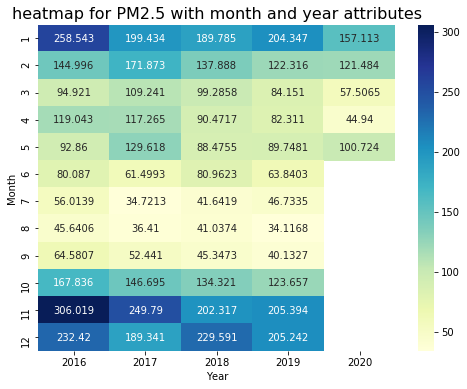

In [223]:
plt.figure(figsize=(8,6))
sns.heatmap(flights, cmap="YlGnBu", annot=True, fmt='g')
plt.title("heatmap for PM2.5 with month and year attributes", fontsize=16, y=1.01)
b, t = plt.ylim() 
b += 0.5
t -= 0.5
plt.ylim(b, t) 
plt.savefig(r'C:\Users\91758\Downloads\Datttta\Images\plot37.png')

#### PM10

In [211]:
dpm=delh[['PM10']]
dpm.reset_index(inplace=True)
dpm['Year']= dpm['Date'].dt.year
dpm['Month']= dpm['Date'].dt.month
dpm.drop('Date', axis=1,inplace=True)
sav = dpm.pivot_table("PM10","Month", "Year")

C:\Users\91758\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\91758\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



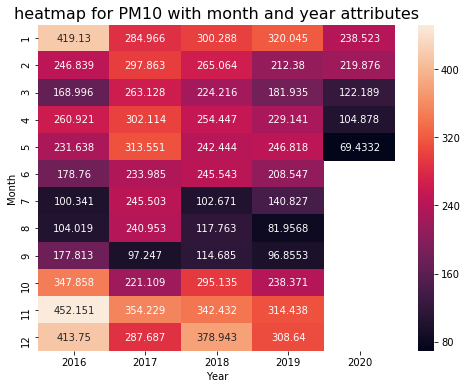

In [212]:
plt.figure(figsize=(8,6))
sns.heatmap(sav, annot=True, fmt='g')
plt.title("heatmap for PM10 with month and year attributes", fontsize=16, y=1.01)
b, t = plt.ylim() 
b += 0.5
t -= 0.5
plt.ylim(b, t) 
plt.savefig(r'C:\Users\91758\Downloads\Datttta\Images\plot38.png')

#### NO2

In [215]:
dn=delh[['NO2']]
dn.reset_index(inplace=True)
dn['Year']= dn['Date'].dt.year
dn['Month']= dn['Date'].dt.month
dn.drop('Date', axis=1,inplace=True)
sav1 = dn.pivot_table("NO2","Month", "Year")

C:\Users\91758\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\91758\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



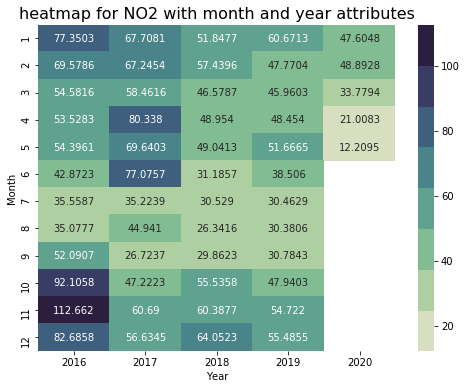

In [219]:
cmap = sns.cubehelix_palette(8, start=.5, rot=-.75)
plt.figure(figsize=(8,6))
sns.heatmap(sav1, cmap=cmap, annot=True, fmt='g')
plt.title("heatmap for NO2 with month and year attributes", fontsize=16, y=1.01)
b, t = plt.ylim() 
b += 0.5
t -= 0.5
plt.ylim(b, t) 
plt.savefig(r'C:\Users\91758\Downloads\Datttta\Images\plot39.png')

#### SO2

In [218]:
ds=delh[['SO2']]
ds.reset_index(inplace=True)
ds['Year']= ds['Date'].dt.year
ds['Month']= ds['Date'].dt.month
ds.drop('Date', axis=1,inplace=True)
sa = ds.pivot_table("SO2","Month", "Year")

C:\Users\91758\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\91758\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



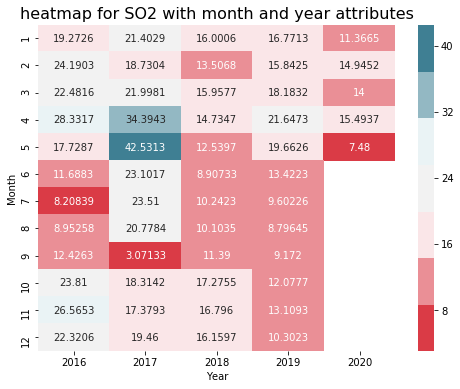

In [222]:
c=sns.diverging_palette(10, 220, sep=80, n=7)
plt.figure(figsize=(8,6))
sns.heatmap(sa, cmap=c, annot=True, fmt='g')
plt.title("heatmap for SO2 with month and year attributes", fontsize=16, y=1.01)
b, t = plt.ylim() 
b += 0.5
t -= 0.5
plt.ylim(b, t) 
plt.savefig(r'C:\Users\91758\Downloads\Datttta\Images\plot40.png')

#### Prophet

In [28]:
city= list(df['City'].value_counts().index)
city

['Bengaluru',
 'Ahmedabad',
 'Chennai',
 'Patna',
 'Hyderabad',
 'Mumbai',
 'Gurugram',
 'Lucknow',
 'Delhi',
 'Amritsar',
 'Jorapokhar',
 'Jaipur',
 'Thiruvananthapuram',
 'Amaravati',
 'Talcher',
 'Brajrajnagar',
 'Kolkata',
 'Guwahati',
 'Shillong',
 'Chandigarh',
 'Bhopal',
 'Kochi',
 'Ernakulam',
 'Aizawl']

In [29]:
Bengaluru= df[df['City']== 'Bengaluru']
Ahmedabad= df[df['City']== 'Ahmedabad']
Chennai= df[df['City']== 'Chennai']
Mumbai= df[df['City']== 'Mumbai']
Lucknow= df[df['City']== 'Lucknow']
Delhi= df[df['City']== 'Delhi']
Hyderabad= df[df['City']== 'Hyderabad']
Patna= df[df['City']== 'Patna']
Gurugram= df[df['City']== 'Gurugram']
Amritsar= df[df['City']== 'Amritsar']
Jorapokhar= df[df['City']== city[10]]
Jaipur= df[df['City']== city[11]]
Thiruvananthapuram= df[df['City']== 'Thiruvananthapuram']
Amaravati= df[df['City']== city[13]]
Talcher= df[df['City']== city[14]]
Brajrajnagar= df[df['City']== city[15]]
Kolkata= df[df['City']== city[16]]
Guwahati= df[df['City']== city[17]]
Shillong= df[df['City']== city[18]]
Chandigarh= df[df['City']== city[19]]
Bhopal= df[df['City']== 'Bhopal']
Kochi= df[df['City']== 'Kochi']
Ernakulam= df[df['City']== 'Ernakulam']
Aizawl= df[df['City']== city[23]]

In [30]:
Bengaluru

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
4475,Bengaluru,2016-01-01,56.40,95.08,13.80,51.73,34.31,14.68,0.69,7.44,55.96,0.91,0.78,8.81,101.0,Moderate
4476,Bengaluru,2016-01-02,53.69,93.92,26.49,73.09,54.77,16.05,0.76,8.67,34.06,1.88,1.18,8.81,92.0,Satisfactory
4477,Bengaluru,2016-01-03,62.35,99.34,24.56,77.77,55.60,16.37,0.96,9.10,47.62,2.36,1.14,8.81,108.0,Moderate
4478,Bengaluru,2016-01-04,64.96,104.62,18.56,77.07,50.81,14.18,0.89,8.87,50.62,1.95,1.33,8.81,109.0,Moderate
4479,Bengaluru,2016-01-05,70.15,105.12,23.56,79.43,56.05,16.97,0.85,9.41,36.94,1.92,1.26,8.81,114.0,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6074,Bengaluru,2020-05-18,42.00,65.00,2.81,4.00,15.70,8.10,4.00,3.00,16.00,0.28,0.61,8.81,75.0,NaN
6075,Bengaluru,2020-05-19,59.00,52.00,2.81,4.00,15.70,8.10,4.00,4.00,7.00,0.28,0.61,8.81,75.0,NaN
6076,Bengaluru,2020-05-20,45.00,51.00,2.81,5.00,15.70,8.10,5.00,4.00,16.00,0.28,0.61,8.81,75.0,NaN
6077,Bengaluru,2020-05-21,47.00,41.00,2.81,4.00,15.70,8.10,7.00,3.00,19.00,0.28,0.61,8.81,75.0,NaN


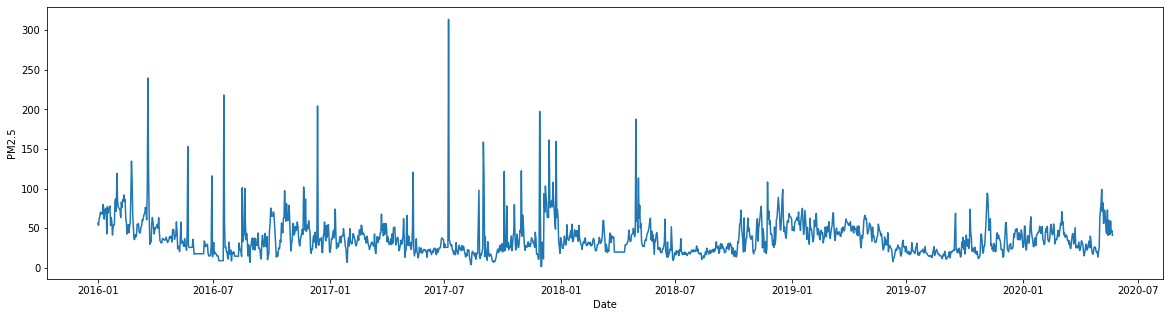

In [31]:
plt.figure(figsize=(20,5))
sns.lineplot(x= 'Date', y='PM2.5', data= Bengaluru)

## Delhi

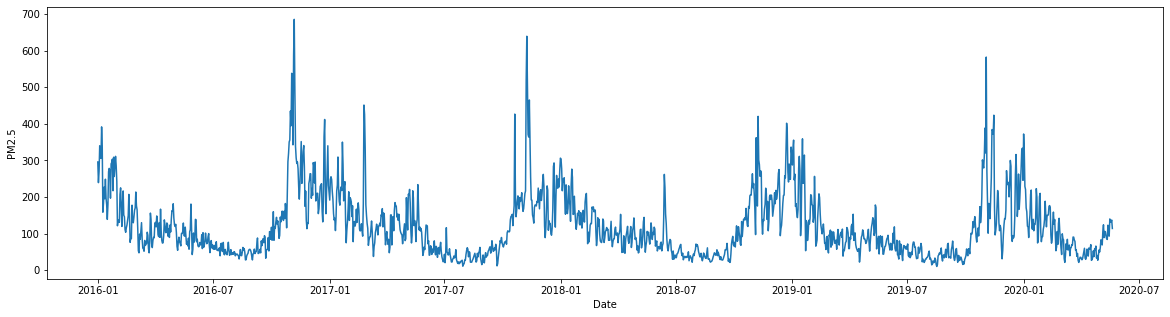

In [32]:
plt.figure(figsize=(20,5))
sns.lineplot(x= 'Date', y='PM2.5', data= Delhi)

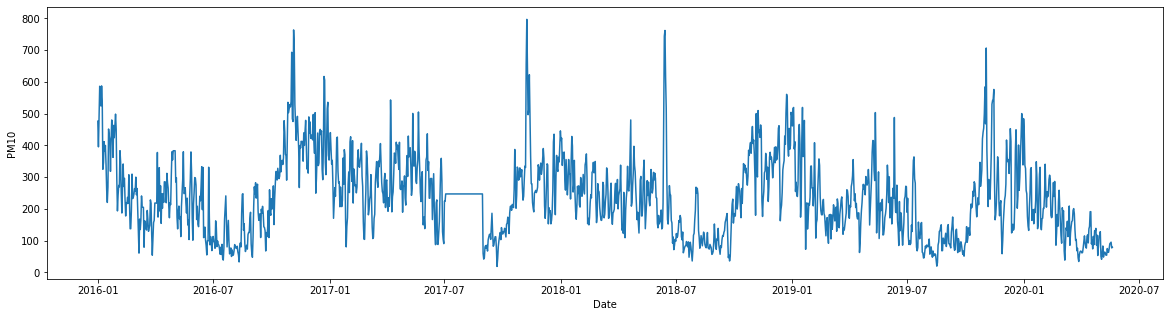

In [33]:
plt.figure(figsize=(20,5))
sns.lineplot(x= 'Date', y='PM10', data= Delhi)

In [34]:
l1=['PM2.5','PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3']

In [35]:
pm2 = Delhi[['Date','PM2.5']]
pm10 = Delhi[['Date','PM10']]
no = Delhi[['Date','NO']]
no2 = Delhi[['Date','NO2']]
nox = Delhi[['Date','NOx']]
co = Delhi[['Date','CO']]
so2 = Delhi[['Date','SO2']]
o3 = Delhi[['Date','O3']]

In [36]:
pm2.rename(columns={'Date':'ds','PM2.5':'y'}, inplace= True)

C:\Users\91758\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [37]:
m = Prophet(interval_width=0.95)
m.fit(pm2)
future = m.make_future_dataframe(periods=1300)
future.tail()

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
2896,2023-12-07
2897,2023-12-08
2898,2023-12-09
2899,2023-12-10
2900,2023-12-11


In [38]:
#predicting the future with date, and upper and lower limit of y value
forecast = m.predict(future)
forecast[['ds', 'yhat']].tail(20)

,ds,yhat
2881,2023-11-22,101.065791
2882,2023-11-23,95.731613
2883,2023-11-24,87.072005
2884,2023-11-25,77.508023
2885,2023-11-26,70.804235
2886,2023-11-27,65.386119
2887,2023-11-28,62.173666
2888,2023-11-29,60.839431
2889,2023-11-30,60.981023
2890,2023-12-01,58.198725


In [39]:
f= forecast[['ds', 'yhat']]
f=f[1400:]

In [115]:
from matplotlib import colors as mcolors
colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)

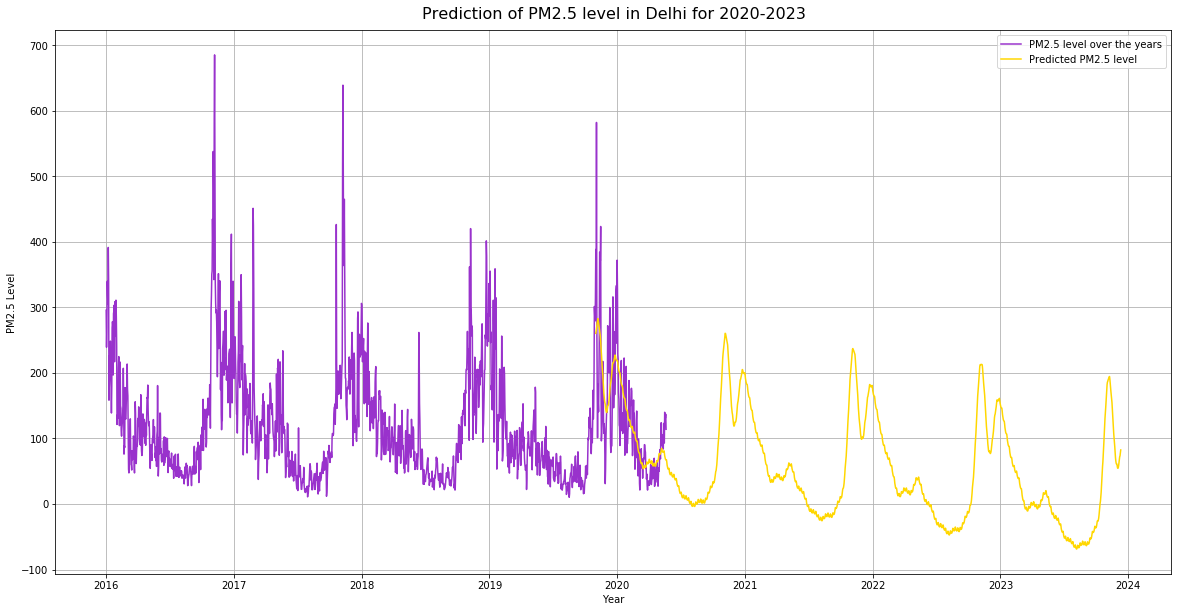

In [46]:
plt.figure(figsize=(20,10))
plt.plot(pm2['ds'], pm2['y'], label = "PM2.5 level over the years" ,color=colors['darkorchid'])
plt.plot(f['ds'], f['yhat'], label = "Predicted PM2.5 level", color=colors['gold'])
plt.xlabel('Year')
plt.ylabel('PM2.5 Level')
plt.title("Prediction of PM2.5 level in Delhi for 2020-2023", fontsize=16, y=1.01)
plt.legend(fontsize=10, loc= 'best')
plt.grid()
plt.savefig(r'C:\Users\91758\Downloads\Datttta\Images\plot20.png')

##### PM10

In [47]:
pm10.rename(columns={'Date':'ds','PM10':'y'}, inplace= True)

C:\Users\91758\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [48]:
m2 = Prophet(interval_width=0.95)
m2.fit(pm10)
future = m2.make_future_dataframe(periods=1300)
forecast = m2.predict(future)
f1= forecast[['ds', 'yhat']]
f1=f1[1590:]

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


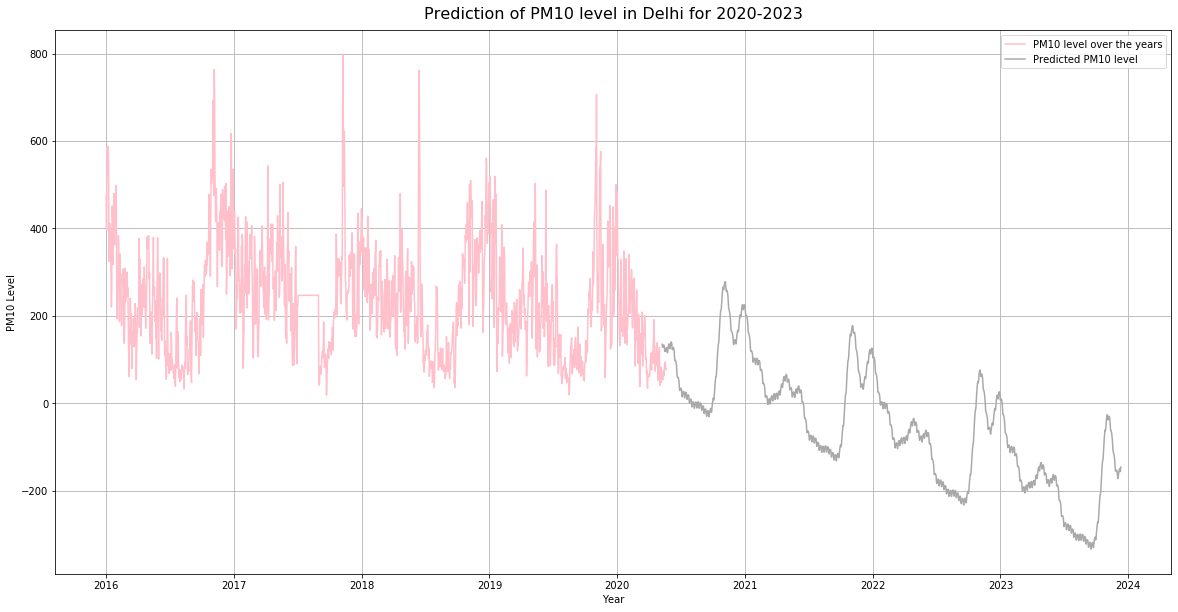

In [50]:
plt.figure(figsize=(20,10))
#fig,ax= subplot()
plt.plot(pm10['ds'], pm10['y'], label= "PM10 level over the years",color=colors['pink'])
plt.plot(f1['ds'], f1['yhat'], label = "Predicted PM10 level", color=colors['darkgrey'])
plt.xlabel('Year')
plt.ylabel('PM10 Level')
plt.title("Prediction of PM10 level in Delhi for 2020-2023", fontsize=16, y=1.01)
plt.legend(fontsize=10, loc= 'best')
plt.grid()
plt.savefig(r'C:\Users\91758\Downloads\Datttta\Images\plot21.png')

###### SO2

In [51]:
so2.rename(columns={'Date':'ds','SO2':'y'}, inplace= True)

C:\Users\91758\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [52]:
m3 = Prophet(interval_width=0.95)
m3.fit(so2)
future = m3.make_future_dataframe(periods=1300)
forecast = m3.predict(future)
f2= forecast[['ds', 'yhat']]
f2=f2[1590:]

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


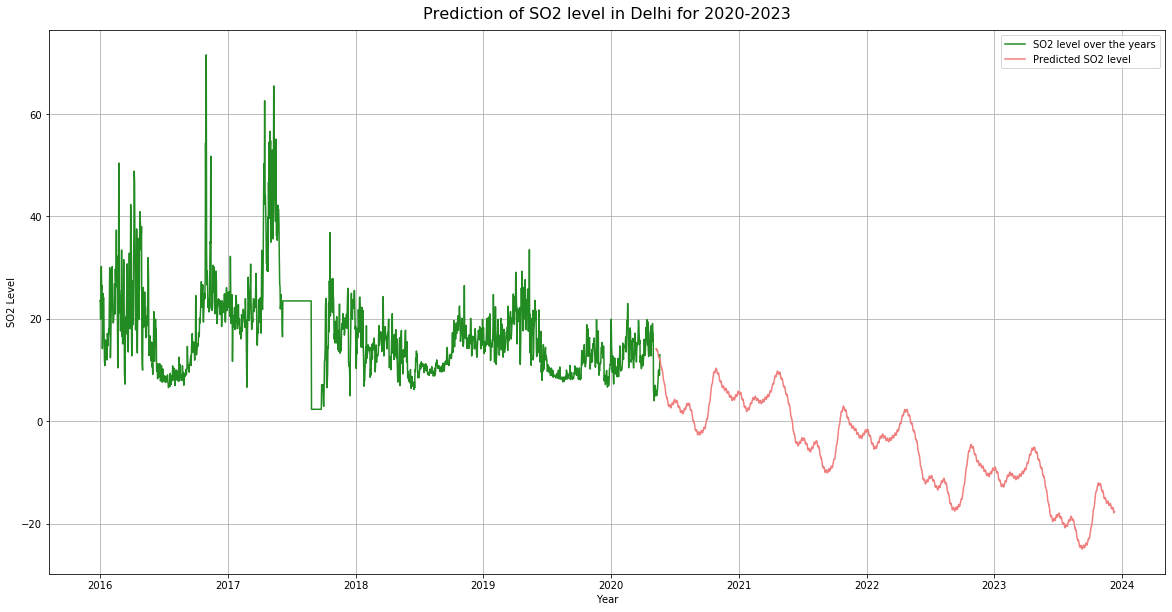

In [53]:
plt.figure(figsize=(20,10))
#fig,ax= subplot()
plt.plot(so2['ds'], so2['y'], label = "SO2 level over the years",color=colors['forestgreen'])
plt.plot(f2['ds'], f2['yhat'], label =  "Predicted SO2 level",color=colors['lightcoral'])
plt.xlabel('Year')
plt.ylabel('SO2 Level')
plt.title("Prediction of SO2 level in Delhi for 2020-2023", fontsize=16, y=1.01)
plt.legend(fontsize=10, loc= 'best')
plt.grid()
plt.savefig(r'C:\Users\91758\Downloads\Datttta\Images\plot22.png')

###### NO2

In [54]:
no2.rename(columns={'Date':'ds','NO2':'y'}, inplace= True)

C:\Users\91758\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [55]:
m4 = Prophet(interval_width=0.95)
m4.fit(no2)
future = m4.make_future_dataframe(periods=1300)
forecast = m4.predict(future)
f3= forecast[['ds', 'yhat']]
f3=f3[1590:]

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


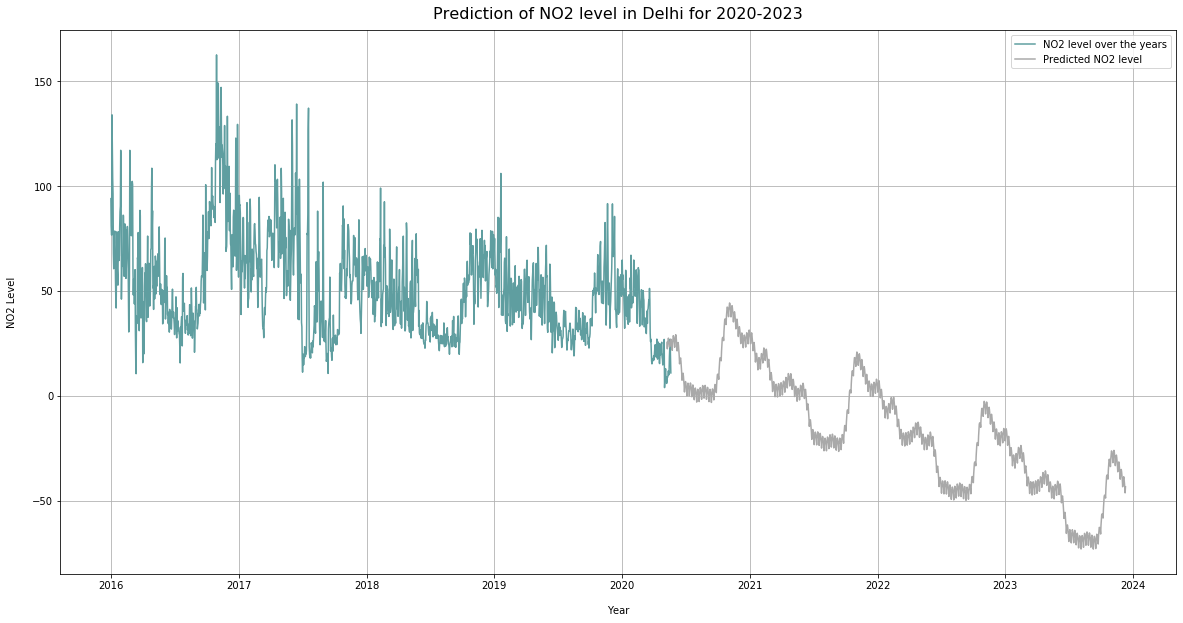

In [56]:
plt.figure(figsize=(20,10))
plt.plot(no2['ds'], no2['y'], label =  "NO2 level over the years",color=colors['cadetblue'])
plt.plot(f3['ds'], f3['yhat'], label =  "Predicted NO2 level", color=colors['darkgray'])
plt.xlabel('Year', labelpad=15)
plt.ylabel('NO2 Level', labelpad=15)
plt.title("Prediction of NO2 level in Delhi for 2020-2023", fontsize=16, y=1.01)
plt.legend(fontsize=10, loc= 'best')
plt.grid()
plt.savefig(r'C:\Users\91758\Downloads\Datttta\Images\plot23.png')

#### Lucknow

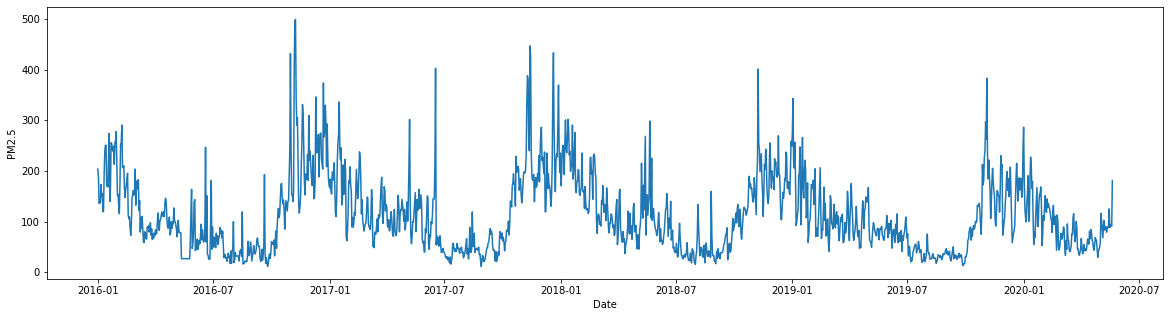

In [57]:
plt.figure(figsize=(20,5))
sns.lineplot(x= 'Date', y='PM2.5', data= Lucknow)

In [58]:
pm2 = Lucknow[['Date','PM2.5']]
no2 = Lucknow[['Date','NO2']]
so2 = Lucknow[['Date','SO2']]

###### PM2.5

In [59]:
pm2.rename(columns={'Date':'ds','PM2.5':'y'}, inplace= True)
ml1 = Prophet(interval_width=0.95)
ml1.fit(pm2)
future = ml1.make_future_dataframe(periods=1300)
forecast = ml1.predict(future)
fp= forecast[['ds', 'yhat']]
fp=fp[1590:]

C:\Users\91758\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


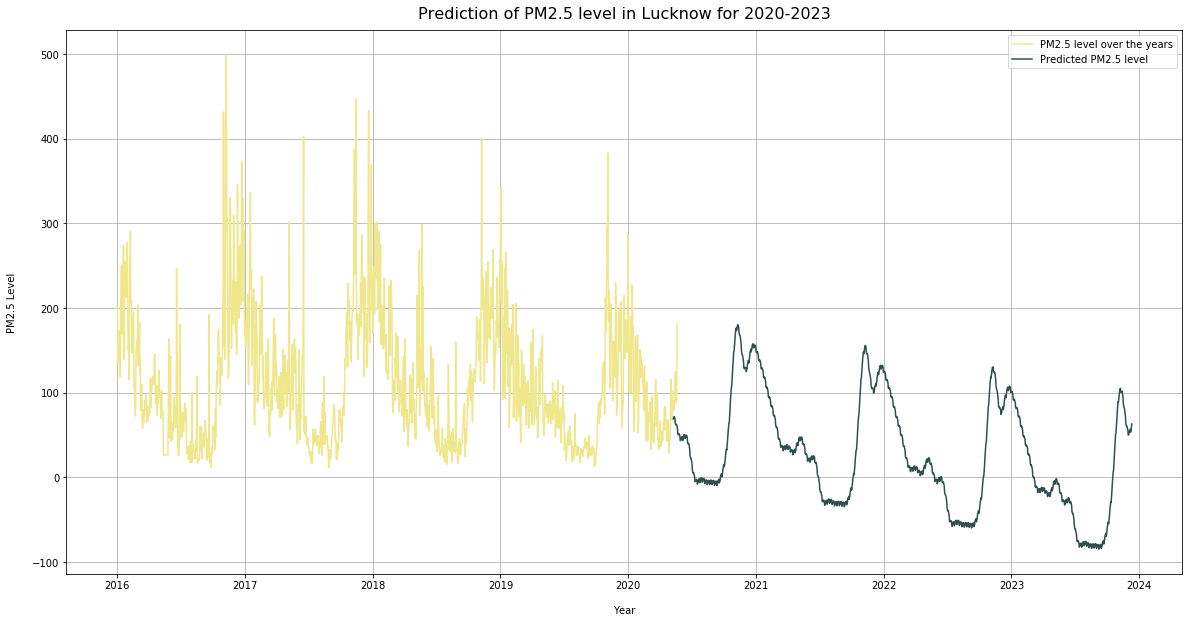

In [60]:
plt.figure(figsize=(20,10))
#fig,ax= subplot()
plt.plot(pm2['ds'], pm2['y'], label = "PM2.5 level over the years",color=colors['khaki'])
plt.plot(fp['ds'], fp['yhat'], label = "Predicted PM2.5 level", color=colors['darkslategrey'])
plt.xlabel('Year', labelpad=15)
plt.ylabel('PM2.5 Level', labelpad=15)
plt.title("Prediction of PM2.5 level in Lucknow for 2020-2023", fontsize=16, y=1.01)
plt.legend(fontsize=10, loc= 'best')
plt.grid()
plt.savefig(r'C:\Users\91758\Downloads\Datttta\Images\plot24.png')

###### SO2

In [61]:
so2.rename(columns={'Date':'ds','SO2':'y'}, inplace= True)
ml2 = Prophet(interval_width=0.95)
ml2.fit(so2)
future = ml2.make_future_dataframe(periods=1300)
forecast = ml2.predict(future)
f2= forecast[['ds', 'yhat']]
f2=f2[1590:]

C:\Users\91758\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


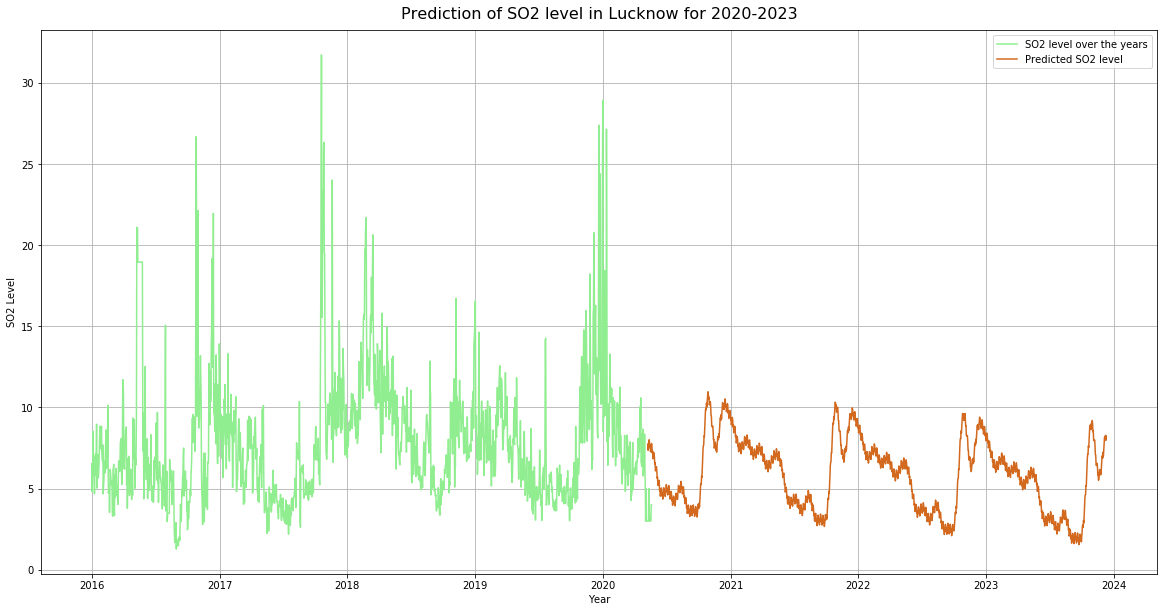

In [62]:
plt.figure(figsize=(20,10))
#fig,ax= subplot()
plt.plot(so2['ds'], so2['y'], label =  "SO2 level over the years", color=colors['lightgreen'])
plt.plot(f2['ds'], f2['yhat'], label = "Predicted SO2 level", color=colors['chocolate'])
plt.xlabel('Year')
plt.ylabel('SO2 Level')
plt.title("Prediction of SO2 level in Lucknow for 2020-2023", fontsize=16, y=1.01)
plt.legend(fontsize=10, loc= 'best')
plt.grid()
plt.savefig(r'C:\Users\91758\Downloads\Datttta\Images\plot25.png')

###### NO2

In [63]:
no2.rename(columns={'Date':'ds','NO2':'y'}, inplace= True)
ml3 = Prophet(interval_width=0.95)
ml3.fit(no2)
future = ml3.make_future_dataframe(periods=1300)
forecast = ml3.predict(future)
f3= forecast[['ds', 'yhat']]
f3=f3[1590:]

C:\Users\91758\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


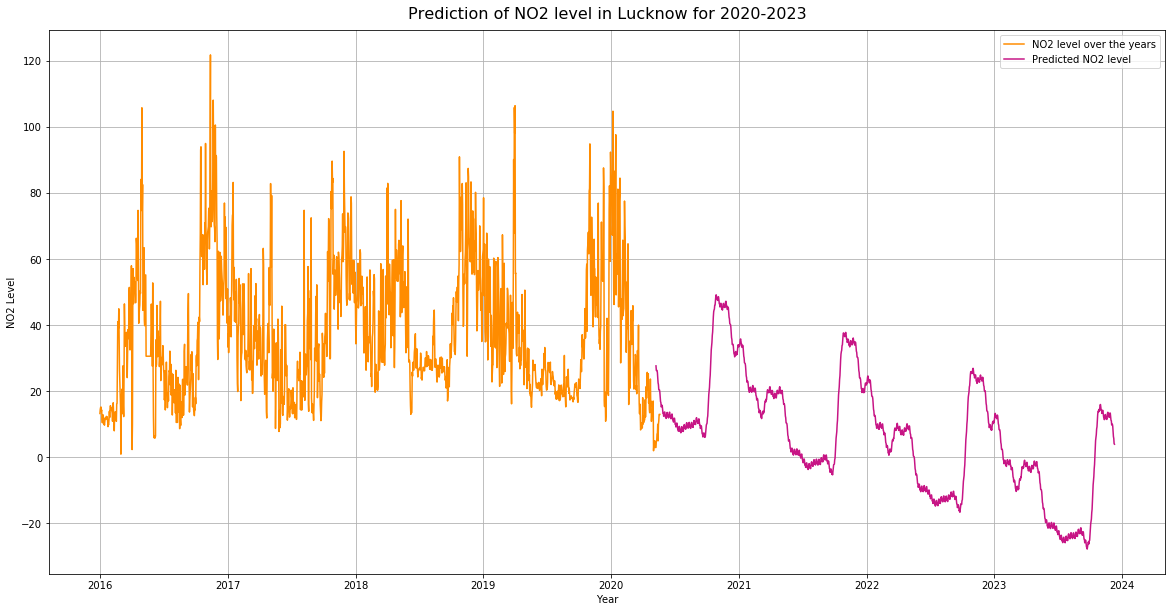

In [64]:
plt.figure(figsize=(20,10))
#fig,ax= subplot()
plt.plot(no2['ds'], no2['y'], label =  "NO2 level over the years", color=colors['darkorange'])
plt.plot(f3['ds'], f3['yhat'], label = "Predicted NO2 level", color=colors['mediumvioletred'])
plt.xlabel('Year')
plt.ylabel('NO2 Level')
plt.title("Prediction of NO2 level in Lucknow for 2020-2023", fontsize=16, y=1.01)
plt.legend(fontsize=10, loc= 'best')
plt.grid()
plt.savefig(r'C:\Users\91758\Downloads\Datttta\Images\plot26.png')

### Life Expectancy

In [65]:
le= pd.read_excel(r'C:\Users\91758\Downloads\Datttta\Life Expantancy.xlsx')
le.head()

,State,"Life expectancy at birth in 2017, years (95% UI)",2017,2019,"Increase in life expectancy if air pollution concentrations were less than the minimum level causing health loss, years (95% UI) Ambient particulate matter pollution",Household air pollution,Air pollution
0,India,69·0 (68·5–69·4),69.0,67.0,0·9 (0·8–1·1),0·7 (0·6–0·8),1·7 (1·6–1·9)
1,Bihar,69·6 (68·5–70·4),69.6,67.0,1·0 (0·7–1·3),0·7 (1·5–1·0),1·9 (1·7–2·1)
2,Madhya Pradesh,67·1 (68·5–67·8),67.1,65.1,0·8 (0·6–1·1),0·9 (0·7–1·1),1·9 (1·7–2·1)
3,Jharkhand,68·6 (68·5–69·2),68.6,66.6,0·7 (0·5–0·9),0·8 (0·6–0·9),1·6 (1·5–1·8)
4,Uttar Pradesh,65·6 (68·5–66·4),65.6,63.6,1·3 (1·0–1·7),0·6 (0·4–0·8),2·2 (1·8–2·5)


In [67]:
le= le[['State','2017', 2019]]
le.head()

,State,2017,2019
0,India,69.0,67.0
1,Bihar,69.6,67.0
2,Madhya Pradesh,67.1,65.1
3,Jharkhand,68.6,66.6
4,Uttar Pradesh,65.6,63.6


In [68]:
le.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   State   32 non-null     object 
 1   2017    32 non-null     float64
 2   2019    32 non-null     float64
dtypes: float64(2), object(1)
memory usage: 896.0+ bytes


In [69]:
le['2018']= le['2017']-1.7

In [70]:
le.drop(2019, axis=1, inplace=True)

In [71]:
le['2019']= le['2018']-2.6

In [72]:
le.head()

,State,2017,2018,2019
0,India,69.0,67.3,64.7
1,Bihar,69.6,67.9,65.3
2,Madhya Pradesh,67.1,65.4,62.8
3,Jharkhand,68.6,66.9,64.3
4,Uttar Pradesh,65.6,63.9,61.3


In [73]:
ind= le.loc[0]
le.drop([0], inplace=True)

In [74]:
le.head()

,State,2017,2018,2019
1,Bihar,69.6,67.9,65.3
2,Madhya Pradesh,67.1,65.4,62.8
3,Jharkhand,68.6,66.9,64.3
4,Uttar Pradesh,65.6,63.9,61.3
5,Rajasthan,68.2,66.5,63.9


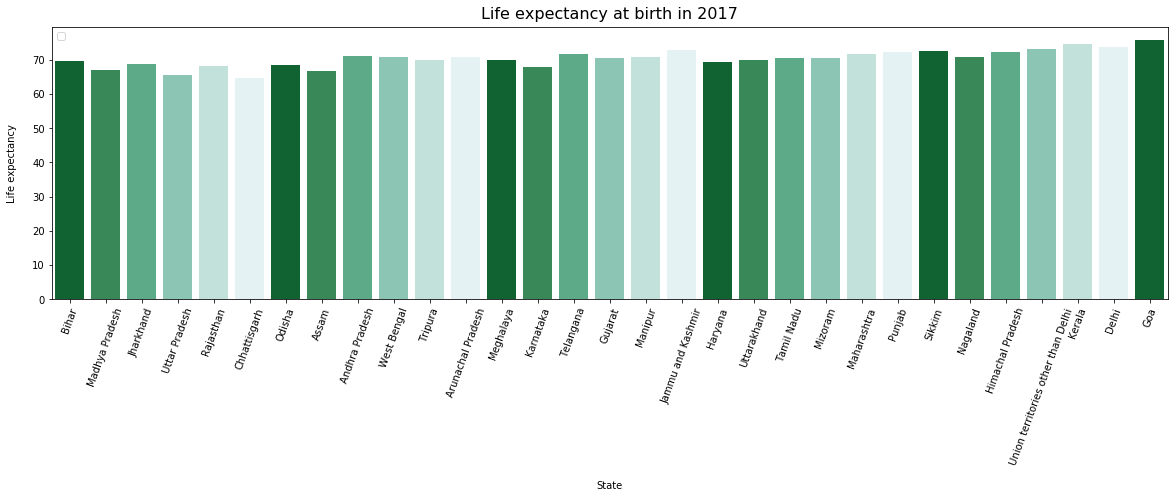

In [76]:
plt.figure(figsize=(20,5))
sns.barplot('State', '2017', data= le, palette=sns.color_palette("BuGn_r"))
plt.xticks(rotation= 70)
plt.xlabel("State", labelpad=15)
plt.ylabel("Life expectancy", labelpad=15)
plt.title("Life expectancy at birth in 2017", fontsize=16, y=1.01)
plt.legend(fontsize=10, loc= 'best')
plt.savefig(r'C:\Users\91758\Downloads\Datttta\Images\plot27.png')

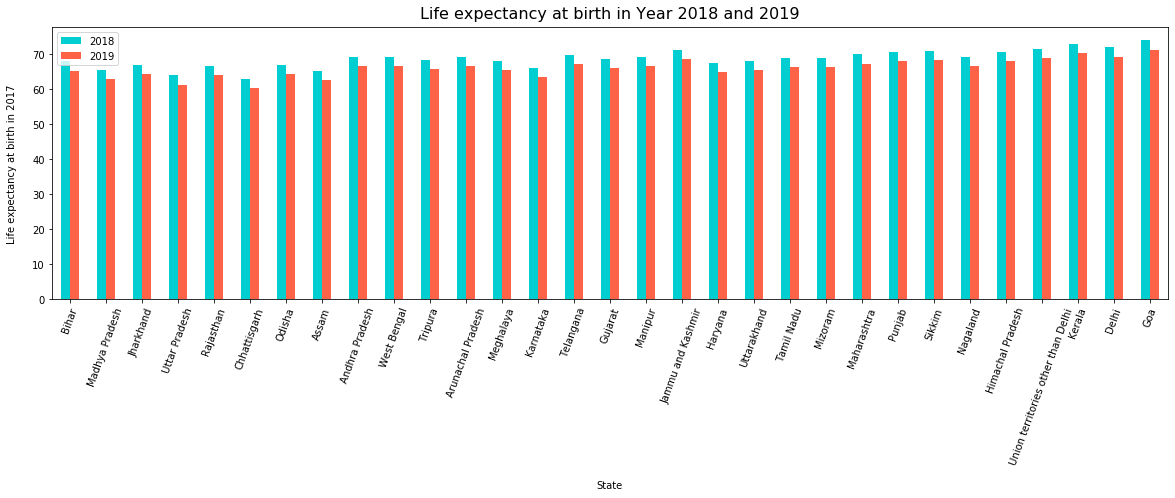

In [78]:
my_colors = list(islice(cycle(['darkturquoise', 'tomato']), None, len(le)))
le.set_index('State')[['2018','2019']].plot(kind='bar', figsize=(20,5), color=my_colors)
plt.xticks(rotation=70)
plt.title("Life expectancy at birth in Year 2018 and 2019", fontsize=16, y=1.01)
plt.xlabel("State", labelpad=15)
plt.ylabel("Life expectancy at birth in 2017", labelpad=15)
plt.legend(fontsize=10, loc= 'best')
plt.savefig(r'C:\Users\91758\Downloads\Datttta\Images\plot28.png')

Life Expectancy due to air pollution will increase but can be decreased due to Coronavirus as Diederik Gommers of NVIC

## Disease Burden Due to Air Pollution

In [79]:
le5= pd.read_excel(r'C:\Users\91758\Downloads\Datttta\Life Expantancy.xlsx', sheet_name='Sheet5')
le5.head()

,Disease,2017,2018,2019
0,lower respiratory infections,29.3,NaN,NaN
1,chronic obstructive pulmonary disease,29.2,NaN,49.0
2,ischaemic heart disease,23.8,NaN,22.0
3,stroke,7.5,NaN,15.0
4,diabetes,6.9,NaN,NaN


In [80]:
le5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Disease  7 non-null      object 
 1   2017     7 non-null      float64
 2   2018     0 non-null      float64
 3   2019     4 non-null      float64
dtypes: float64(3), object(1)
memory usage: 352.0+ bytes


In [81]:
a= le5[['Disease',2019]]
a.dropna(inplace=True)
a

C:\Users\91758\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Disease,2019
1,chronic obstructive pulmonary disease,49.0
2,ischaemic heart disease,22.0
3,stroke,15.0
5,lung cancer,33.0


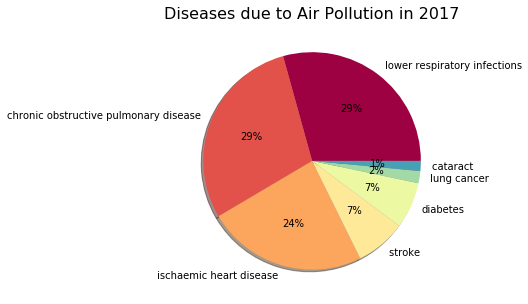

In [82]:
plt.figure(figsize=(5,5))
cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]
plt.pie(le5[2017],labels=le5['Disease'], autopct='%0.0f%%', shadow=True,colors= colors)
plt.title("Diseases due to Air Pollution in 2017", fontsize=16)
plt.savefig(r'C:\Users\91758\Downloads\Datttta\Images\plot29.png')
plt.show()

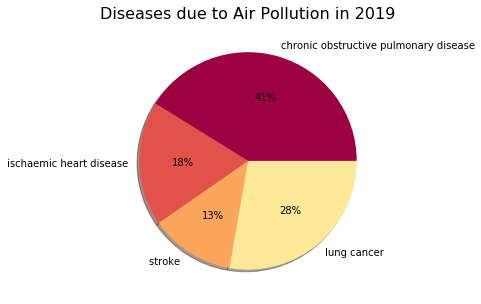

In [83]:
plt.figure(figsize=(5,5))
plt.pie(a[2019],labels=a['Disease'], autopct='%0.0f%%', shadow=True,colors= colors)
plt.title("Diseases due to Air Pollution in 2019", fontsize=16)
plt.savefig(r'C:\Users\91758\Downloads\Datttta\Images\plot30.png')
plt.show()

## Disability Adjusted Life Year

In [84]:
le4= pd.read_excel(r'C:\Users\91758\Downloads\Datttta\Life Expantancy.xlsx', sheet_name='Sheet6')
le4.head()

,State,ambient particulate,Low ambient,High ambient,DALY rate per 100 000 population attributable to household\r\nair pollution (95% UI,DALY rate per 100 000 population attributable to household\r\nair pollution (95% .1,DALY rate per 100 000 population attributable to air pollution (95% UI).1,air low,air high
0,India,1546,1284,1818,1146,965–1374,2802,2502,3072
1,Low SDI states,1733,1362,2110,1384,1131–1702,3239,2834,3599
2,Bihar,1639,1042,2175,1237,836–1726,2957,2557,3356
3,Madhya Pradesh,1416,1010,1958,1591,1173–2006,3116,2733,3519
4,Jharkhand,1093,791,1484,1237,894–1553,2412,2127,2711


In [85]:
le4.columns

Index(['State', ' ambient particulate ', 'Low ambient', 'High ambient',
       'DALY rate per 100 000 population attributable to household\r\nair pollution (95% UI',
       'DALY rate per 100 000 population attributable to household\r\nair pollution (95% .1',
       'DALY rate per 100 000 population attributable to air pollution (95% UI).1',
       'air low', 'air high'],
      dtype='object')

In [86]:
le4.rename(columns={'DALY rate per 100 000 population attributable to ambient particulate matter pol':'ambient particulate',
                  'DALY rate per 100 000 population attributable to ambient particulate matter p.1':'ambient particulate range',
                  'DALY rate per 100 000 population attributable to air pollution (95% UI).1':'air pollution',
                  'DALY rate per 100 000 population attributable to air pollution (95% UI).2':'air pollution range'}, inplace=True)

In [87]:
le4.head()

,State,ambient particulate,Low ambient,High ambient,DALY rate per 100 000 population attributable to household\r\nair pollution (95% UI,DALY rate per 100 000 population attributable to household\r\nair pollution (95% .1,air pollution,air low,air high
0,India,1546,1284,1818,1146,965–1374,2802,2502,3072
1,Low SDI states,1733,1362,2110,1384,1131–1702,3239,2834,3599
2,Bihar,1639,1042,2175,1237,836–1726,2957,2557,3356
3,Madhya Pradesh,1416,1010,1958,1591,1173–2006,3116,2733,3519
4,Jharkhand,1093,791,1484,1237,894–1553,2412,2127,2711


In [88]:
sdi= le4.iloc[[0,1,10,22],]
le4.drop([0,1,10,22], axis=0, inplace=True)

In [89]:
sdi

,State,ambient particulate,Low ambient,High ambient,DALY rate per 100 000 population attributable to household\r\nair pollution (95% UI,DALY rate per 100 000 population attributable to household\r\nair pollution (95% .1,air pollution,air low,air high
0,India,1546,1284,1818,1146,965–1374,2802,2502,3072
1,Low SDI states,1733,1362,2110,1384,1131–1702,3239,2834,3599
10,Middle SDI states,1322,1079,1582,1066,872–1278,2494,2222,2768
22,High SDI states,1424,1187,1676,738,595–899,2250,1990,2496


In [90]:
sd= sdi.loc[1:,]
sd.columns

Index(['State', ' ambient particulate ', 'Low ambient', 'High ambient',
       'DALY rate per 100 000 population attributable to household\r\nair pollution (95% UI',
       'DALY rate per 100 000 population attributable to household\r\nair pollution (95% .1',
       'air pollution', 'air low', 'air high'],
      dtype='object')

In [91]:
sd.set_index('State', inplace=True)

C:\Users\91758\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


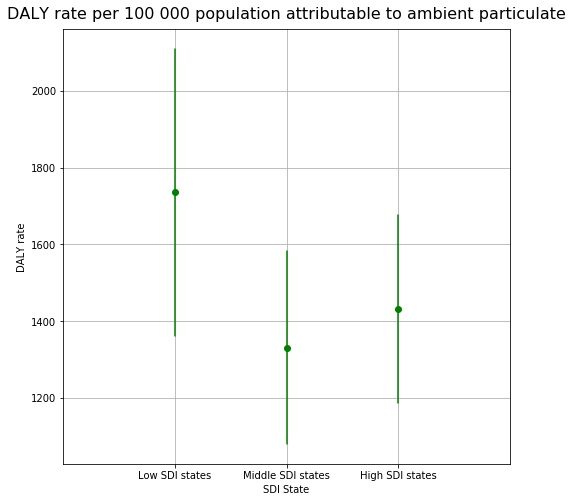

In [93]:
plt.figure(figsize=(8,8))
ax = sns.tsplot([sd['High ambient'], sd['Low ambient']], err_style="ci_bars", 
                interpolate=False, color='g')
ax.set_xticks(np.arange(0, sd.shape[0]))
ax.set_xticklabels(sd.index)
plt.xlabel('SDI State')
plt.ylabel('DALY rate')
plt.title("DALY rate per 100 000 population attributable to ambient particulate", fontsize=16, y=1.01)
plt.grid()
plt.savefig(r'C:\Users\91758\Downloads\Datttta\Images\plot31.png')

In [94]:
le4.set_index('State', inplace=True)

C:\Users\91758\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


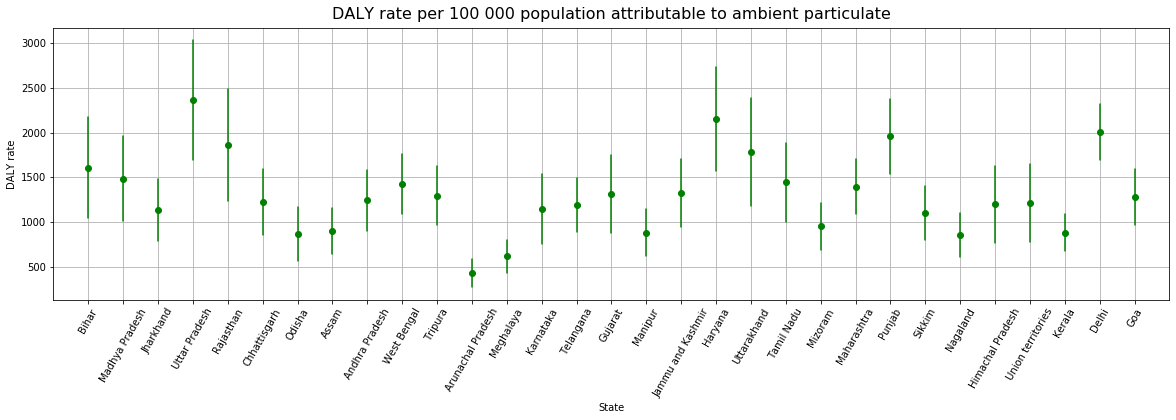

In [106]:
plt.figure(figsize=(20,5))
ax = sns.tsplot([le4['High ambient'], le4['Low ambient']], err_style="ci_bars", 
                interpolate=False, color='g')
ax.set_xticks(np.arange(0, le4.shape[0]))
ax.set_xticklabels(le4.index)
plt.xticks(rotation=60)
plt.xlabel('State')
plt.ylabel('DALY rate')
plt.title("DALY rate per 100 000 population attributable to ambient particulate", fontsize=16, y=1.01)
plt.grid()
plt.savefig(r'C:\Users\91758\Downloads\Datttta\Images\plot32.png')

# Deaths Due to Air Pollution

### Pre Corona

In [96]:
death= pd.read_csv(r"C:\Users\91758\Downloads\Datttta\death-rate-by-source-from-air-pollution.csv")

In [97]:
death=death[death['Entity']=='India']
death.head()

,Entity,Code,Year,"Outdoor ozone pollution (deaths per 100,000)","Household pollution (deaths per 100,000)","Outdoor particulate pollution (deaths per 100,000)"
2660,India,IND,12/31/1990,25.479616,140.873078,57.500137
2661,India,IND,12/31/1991,25.352090,138.362456,58.194474
2662,India,IND,12/31/1992,25.139187,135.459209,59.060688
2663,India,IND,12/31/1993,24.448590,129.963198,58.528327
2664,India,IND,12/31/1994,23.949792,125.203988,58.334058


In [98]:
death['Year']= pd.to_datetime(death['Year'])

In [99]:
death['Year'].unique()

array(['1990-12-31T00:00:00.000000000', '1991-12-31T00:00:00.000000000',
       '1992-12-31T00:00:00.000000000', '1993-12-31T00:00:00.000000000',
       '1994-12-31T00:00:00.000000000', '1995-12-31T00:00:00.000000000',
       '1996-12-31T00:00:00.000000000', '1997-12-31T00:00:00.000000000',
       '1998-12-31T00:00:00.000000000', '1999-12-31T00:00:00.000000000',
       '2000-12-31T00:00:00.000000000', '2001-12-31T00:00:00.000000000',
       '2002-12-31T00:00:00.000000000', '2003-12-31T00:00:00.000000000',
       '2004-12-31T00:00:00.000000000', '2005-12-31T00:00:00.000000000',
       '2006-12-31T00:00:00.000000000', '2007-12-31T00:00:00.000000000',
       '2008-12-31T00:00:00.000000000', '2009-12-31T00:00:00.000000000',
       '2010-12-31T00:00:00.000000000', '2011-12-31T00:00:00.000000000',
       '2012-12-31T00:00:00.000000000', '2013-12-31T00:00:00.000000000',
       '2014-12-31T00:00:00.000000000', '2015-12-31T00:00:00.000000000',
       '2016-12-31T00:00:00.000000000', '2017-12-31

In [100]:
d=death[death['Year']>'12/31/2014']

In [101]:
d

,Entity,Code,Year,"Outdoor ozone pollution (deaths per 100,000)","Household pollution (deaths per 100,000)","Outdoor particulate pollution (deaths per 100,000)"
2685,India,IND,2015-12-31,17.211842,56.864057,69.485160
2686,India,IND,2016-12-31,17.307470,54.362844,70.131953
2687,India,IND,2017-12-31,17.240293,51.027440,70.803435
2688,India,IND,2018-12-31,19.500000,51.027440,70.803435
2689,India,IND,2019-12-31,20.918230,51.027440,70.803435


In [102]:
d['Year']=d['Year'].dt.year

C:\Users\91758\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


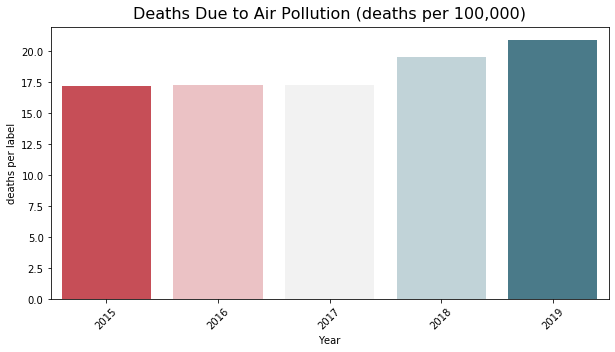

In [113]:
#d.set_index("Year")[['Outdoor ozone pollution (deaths per 100,000)', 'Outdoor particulate pollution (deaths per 100,000)']].plot(kind='bar',width=0.25, figsize=(10,10))
plt.figure(figsize=(10,5))
sns.barplot('Year','Outdoor ozone pollution (deaths per 100,000)', data= d, palette=sns.diverging_palette(10, 220, sep=80, n=5))
plt.xticks(rotation=45)
plt.ylabel("deaths per label")
plt.title("Deaths Due to Air Pollution (deaths per 100,000)", fontsize=16, y=1.01)
plt.savefig(r'C:\Users\91758\Downloads\Datttta\Images\plot33.png')

### Post Corona

In [108]:
ozone= death[['Year','Outdoor ozone pollution (deaths per 100,000)']]
ozone.rename(columns= {'Year':'ds', 'Outdoor ozone pollution (deaths per 100,000)':'y'}, inplace=True)

C:\Users\91758\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [109]:
ozone

,ds,y
2660,1990-12-31,25.479616
2661,1991-12-31,25.352090
2662,1992-12-31,25.139187
2663,1993-12-31,24.448590
2664,1994-12-31,23.949792
2665,1995-12-31,23.450432
2666,1996-12-31,23.234831
2667,1997-12-31,23.862899
2668,1998-12-31,23.785558
2669,1999-12-31,22.608552


In [110]:
md = Prophet(interval_width=0.99)
md.fit(ozone)
future = md.make_future_dataframe(periods=4, freq='A')
forecast = md.predict(future)
fpp= forecast[['ds', 'yhat']]

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.


In [134]:
ozone= ozone[-8:]

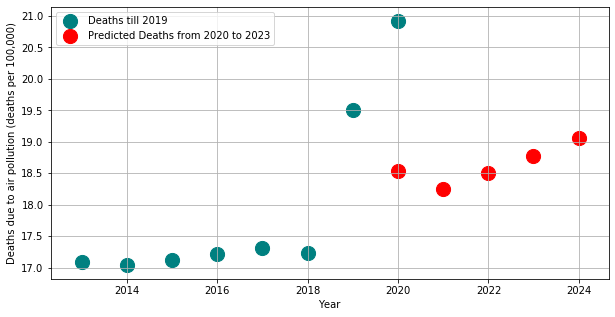

In [138]:
plt.figure(figsize=(10,5))
plt.scatter(ozone['ds'], ozone['y'],s=200, label = "Deaths till 2019",color=colors['teal'])
plt.scatter(fpp['ds'], fpp['yhat'], s=200,label = "Predicted Deaths from 2020 to 2023",color=colors['red'])
plt.xlabel('Year')
plt.ylabel('Deaths due to air pollution (deaths per 100,000)')
plt.legend(fontsize=10, loc= 'best')
plt.grid()
plt.savefig(r'C:\Users\91758\Downloads\Datttta\Images\plot34.png')

In [155]:
fpp=fpp[-10:]
fpp.rename(columns={'ds':'Year','yhat':'Predicted Deaths(per 100,000)'}, inplace=True)
fpp['Year']= fpp['Year'].dt.year
fpp['Predicted Deaths(per 100,000)']= round(fpp['Predicted Deaths(per 100,000)'],6)

In [166]:
fig = go.Figure(data=[go.Table(
    header=dict(values=list(fpp.columns),
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[fpp.Year, fpp['Predicted Deaths(per 100,000)']],
               fill_color='lavender',
               align='left'),
)
])
fig.show()